# IMPORTAZIONE LIBRERIE UTILI

In [1]:
from matplotlib import pyplot as  plt
import numpy as np 
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import find_peaks
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from glob import glob
import pandas as pd 
from scipy.stats import linregress
from scipy.signal import argrelextrema

# ACQUISIZIONE E LETTURA DATI GREZZI (Trovare il tau di RC)

In [2]:
data1=np.genfromtxt("C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 1/r554o-c3300micF.txt")  #cambiare \ con /
dati_grezzi1 = np.array(data1[:])

data2=np.genfromtxt("C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 1/r119+82ko-c10micF.txt")  #cambiare \ con /
dati_grezzi2 = np.array(data2[:])

data3=np.genfromtxt("C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 1/r119,35ko-c10micF.txt")  #cambiare \ con /
dati_grezzi3 = np.array(data3[:])

data4=np.genfromtxt("C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 1/r31,22ko-c640micF.txt")  #cambiare \ con /
dati_grezzi4 = np.array(data4[:])

data5=np.genfromtxt("C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 1/r29,2ko-c330micF.txt")  #cambiare \ con /
dati_grezzi5 = np.array(data5[:])

data6=np.genfromtxt("C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 1/r1,390ko-c3300micF.txt")  #cambiare \ con /
dati_grezzi6 = np.array(data6[:])

data7=np.genfromtxt("C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 1/r1,390ko-c330micF.txt")  #cambiare \ con /
dati_grezzi7 = np.array(data7[:])

# CONDIZIONI INIZIALI (trovare il tau di RC)
popolamento liste, errori associati ai dati 

In [3]:
#tempi e tensione ai capi del condensatore
#tempo in [s] e Vc in [V]
t1 = dati_grezzi1[:,0]
Vc1 = dati_grezzi1[:,1]

t2 = dati_grezzi2[:,0]
Vc2 = dati_grezzi2[:,1]

t3 = dati_grezzi3[:,0]
Vc3 = dati_grezzi3[:,1]

t4 = dati_grezzi4[:,0]
Vc4 = dati_grezzi4[:,1]

t5 = dati_grezzi5[:,0]
Vc5 = dati_grezzi5[:,1]

t6 = dati_grezzi6[:,0]
Vc6 = dati_grezzi6[:,1]

t7 = dati_grezzi7[:,0]
Vc7 = dati_grezzi7[:,1]

#resistenze riportante in [kiloOhm] 
R = np.array([0.554, 201.7 ,119.35 ,31.22 ,29.20, 1.390, 1.390])

#capacità riportate in milliFarad [mF]
C = np.array([3300,10,10,640,330,3300,330])/1000

#errori sulle grandezze 
err_t = 0.001 #1 ms
err_Vc = 0.001 # 1 mV
err_R = [0.001,0.1,0.01,0.01,0.01,0.001,0.001] #1 ohm
err_C = C/10

#calcolo dei Tau di RC 
tau = R*C
err_tau = ((err_R/R) + (err_C/C))*tau
for i in range(len(tau)):
    print("Tau teorico " + str(i+1) + " = " + str(round(tau[i],2)) + " +- " + str(round(err_tau[i],2)) + " s")


Tau teorico 1 = 1.83 +- 0.19 s
Tau teorico 2 = 2.02 +- 0.2 s
Tau teorico 3 = 1.19 +- 0.12 s
Tau teorico 4 = 19.98 +- 2.0 s
Tau teorico 5 = 9.64 +- 0.97 s
Tau teorico 6 = 4.59 +- 0.46 s
Tau teorico 7 = 0.46 +- 0.05 s


# Funzioni utili 

In [4]:
def trova_massimi(time, voltage, prominence):
    # Trova i massimi locali con una soglia di prominenza per evitare falsi massimi
    peaks, _ = find_peaks(voltage, prominence=prominence)  # Soglia regolabile
    time_peaks = time[peaks]
    voltage_peaks = voltage[peaks]
    return time_peaks, voltage_peaks

def trova_minimi(time, voltage, prominence):
    # Trova i minimi locali con una soglia di prominenza per evitare falsi minimi
    troughs, _ = find_peaks(-voltage, prominence=prominence)  # Soglia regolabile
    time_troughs = time[troughs]
    voltage_troughs = voltage[troughs]
    return time_troughs, voltage_troughs

def RC(t,tau,A,B):
    return A*np.exp(-t/tau) + B

def fit_RC_function(times,voltage,initial_guess):
    popt, pcov = curve_fit(RC, times, voltage, p0=initial_guess, sigma=err_Vc, absolute_sigma=True)

    Tau_fit, A_fit, B_fit = popt
    voltage_fit = RC(times, Tau_fit, A_fit, B_fit)
    
    errors = np.sqrt(np.diag(pcov))  
    Tau_err, A_err, B_err = errors
    print("parametri di fit (tau, A, B): "+str(popt)+" +- " + str(errors))
    print("Tau sperimentale= " + str(round(popt[0],2)) + " +- " + str(round(errors[0],2)) + " s")

    return voltage_fit

def plot_RC_fit(times,voltage,times_peaks,voltage_peaks,initial_guess,i,scatter=bool):
    popt, pcov = curve_fit(RC, times_peaks, voltage_peaks, p0=initial_guess, sigma=err_Vc, absolute_sigma=True)

    Tau_fit, A_fit, B_fit = popt
    voltage_fit = RC(times_peaks, Tau_fit, A_fit, B_fit)
    
    errors = np.sqrt(np.diag(pcov))  
    Tau_err, A_err, B_err = errors
    print("parametri di fit (tau, A, B): "+str(popt)+" +- " + str(errors))
    print("Tau sperimentale= " + str(round(popt[0],2)) + " +- " + str(round(Tau_err,2)) + " s")

    fig, ax = plt.subplots()
    ax.plot(times, voltage, color="red",label="dati sperimentali")
    ax.plot(times_peaks, voltage_fit, 'b-', label="fit esponenziale",zorder=10)
    if scatter==True:
        ax.scatter(times_peaks, voltage_peaks, color="black",label="massimi dataset", marker="x")
    ax.set_xlabel("$t$ [s]")
    ax.set_ylabel("$V_C$ [V]")
    ax.legend(loc="lower right")
    ax.set_ylabel
    ax.set_title("R = "+ str(R[i]) + r" $k\Omega$" + "   C = " + str(C[i]) + r" $mF$")

    #if scatter==True:
        # ax_inset = inset_axes(ax, width="30%", height="30%", loc="right", borderpad=2)
        # ax_inset.errorbar(y=0, x=tau[i], xerr=err_tau[i], fmt='o', color='red', capsize=2, elinewidth=2, capthick=2)
        # ax_inset.errorbar(y=0, x=popt[0], xerr=errors[0], fmt='o', color='blue', capsize=2, elinewidth=2, capthick=2)
    plt.show()

def linear(X,M,Q):
    return M*X + Q

def linear_fit(x,y):    
    popt, pcov = curve_fit(linear,x, y, sigma=0.001, absolute_sigma=True)
    m,q = popt
    errors = np.sqrt(np.diag(pcov))
    m_err,q_err = errors
    print("m = " + str(m) + " +- " + str(m_err))
    print("q = " + str(q) + " +- " + str(q_err))
    return m,m_err,q,q_err

def linear_regression(x,y):
    m, q, r, p, err = linregress(x, y)
    print("m = " + str(m) + " +- " + str(err))
    print("q = " + str(q) + " +- " + str(err))
    print("r^2 = " + str((r**2)*100)+" %")
    return m, err, q, err

def plot_linear_fit(x_teorico,y_teorico,m_teorico,q_teorico,x_sperimentale,y_sperimentale,m_sperimentale,q_sperimentale, xlabel, ylabel, \
                                 x_err_teorico, yerr_teorico,x_err_sperimentale, yerr_sperimentale,x_teorico_fit,x_sperimentale_fit):
    fig, ax = plt.subplots(figsize=(8,7))
    ax.errorbar(x_teorico, y_teorico, fmt=".", color="darkblue", capsize=3, xerr=x_err_teorico, yerr=yerr_teorico,elinewidth=2,capthick=2)
    ax.plot(x_teorico_fit, m_teorico*x_teorico_fit + q_teorico, 'b-', label="dati teorici")
    ax.errorbar(x_sperimentale, y_sperimentale, fmt=".", color="darkred", capsize=3, xerr=x_err_sperimentale, yerr=yerr_sperimentale,elinewidth=2,capthick=2)
    ax.plot(x_sperimentale_fit, m_sperimentale*x_sperimentale_fit + q_sperimentale, 'red', label="dati sperimentali")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc="upper left")

    ax_inset = inset_axes(ax,width="50%", height="50%", loc='lower right', borderpad=3)
    ax_inset.errorbar(x_teorico, y_teorico,xerr=x_err_teorico, yerr=yerr_teorico, fmt='.', color='darkblue',capsize=3,elinewidth=2,capthick=2)
    ax_inset.plot(x_teorico_fit, m_teorico*x_teorico_fit + q_teorico, 'blue')
    ax_inset.errorbar(x_sperimentale, y_sperimentale,xerr=x_err_sperimentale ,yerr=yerr_sperimentale, fmt='.', color='darkred',capsize=3,elinewidth=2,capthick=2)
    ax_inset.plot(x_sperimentale_fit, m_sperimentale*x_sperimentale_fit + q_sperimentale, 'red')
    ax_inset.set_xlim(-0.5, 6)
    ax_inset.set_ylim(-0.5, 2)

    plt.show()
    
    print("y_teorico = " + str(m_teorico) + "x " + str(q_teorico))
    print("y_sperimentale = " + str(m_sperimentale) + "x " + str(q_sperimentale))

def sinusoid(t, A, f, phi, B):
    return A*np.sin(2*np.pi*f*t + phi) + B

def residuals(times, voltage, voltage_fit):
    i=0
    sum_res = 0
    residuals = voltage - voltage_fit
    fig, ax = plt.subplots()
    
    ax.scatter(times, residuals, color='black', s=3, label='Residuals')
    ax.scatter(times, voltage, color='red', s=3, label='Dati sperimentali')
    ax.scatter(times, voltage_fit, color='blue', s=3, label='Fit')
    ax.axhline(0, color='red', linestyle='-', linewidth=2)

    ax.set_xlabel("$t$ [s]")
    ax.set_ylabel("Residuals [V]")
    plt.show()
    for i in range(len(residuals)):
        sum_res = np.sum(residuals)
    print("Somma dei residui = " + str(sum_res))


# GRAFICI RC 

Tau teorico 1 = 1.83 +- 0.19 s
parametri di fit (tau, A, B): [ 2.23416575 -0.28595077  0.03190501] +- [0.01635859 0.00122849 0.00032334]
Tau sperimentale= 2.23 +- 0.02 s


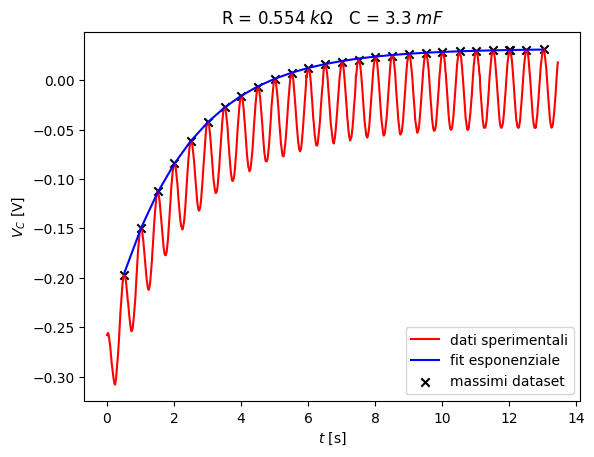

tau = 2.02 +- 0.2 s
parametri di fit (tau, A, B): [ 2.49392036 -0.11225656  0.22166808] +- [0.02895055 0.00081869 0.00013465]
Tau sperimentale= 2.49 +- 0.03 s


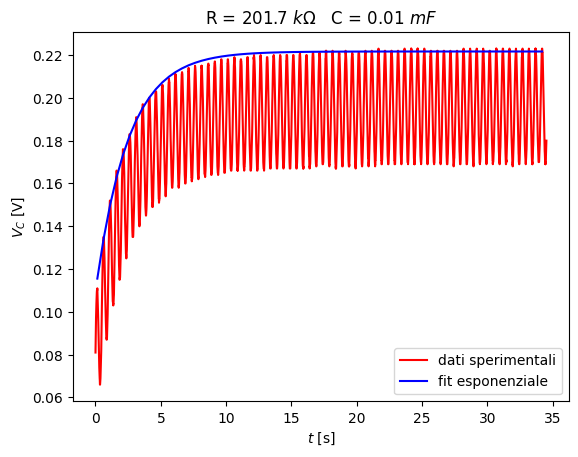

tau = 1.19 +- 0.12 s
parametri di fit (tau, A, B): [1.2419051  0.02813843 0.17591176] +- [0.08703986 0.00136978 0.00016743]
Tau sperimentale= 1.24 +- 0.09 s


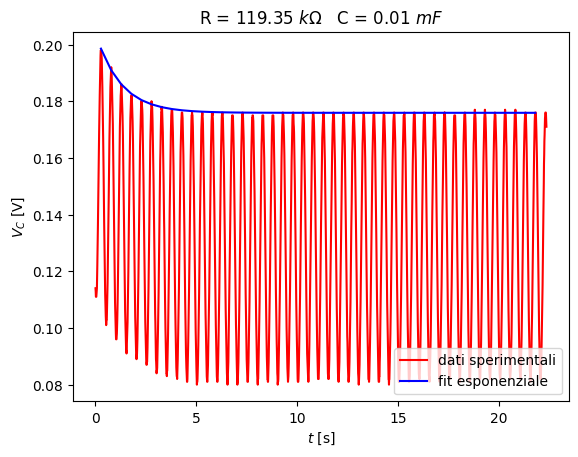

tau = 19.98 +- 2.0 s
parametri di fit (tau, A, B): [26.47787901 -0.38499493 -0.04730054] +- [3.26240278e-02 2.68277068e-04 8.14773871e-05]
Tau sperimentale= 26.48 +- 0.03 s


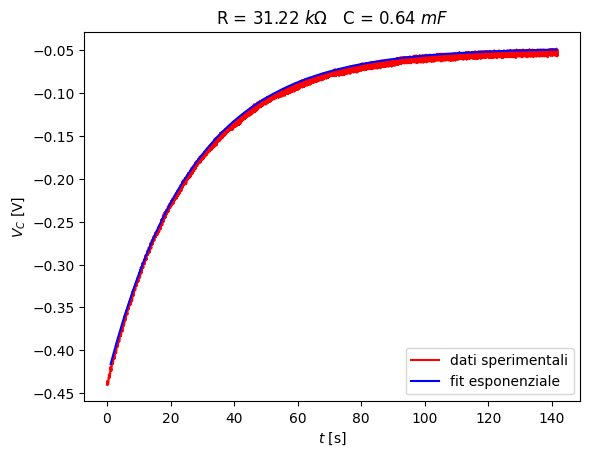

tau = 9.64 +- 0.97 s
parametri di fit (tau, A, B): [ 9.77341446 -0.0185868   0.04689852] +- [1.32963597e+00 1.25178598e-03 3.46064439e-04]
Tau sperimentale= 9.77 +- 1.33 s


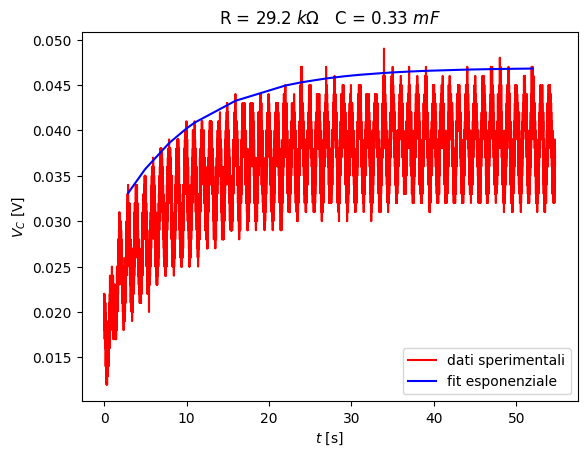

tau = 4.59 +- 0.46 s
parametri di fit (tau, A, B): [6.19644595 0.0133415  0.00875164] +- [5.00906725e-01 5.77950824e-04 1.95866417e-04]
Tau sperimentale= 6.2 +- 0.5 s


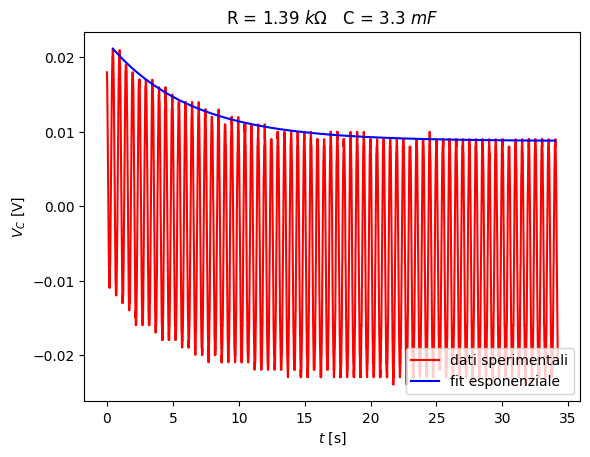

tau = 0.46 +- 0.05 s
parametri di fit (tau, A, B): [0.45263006 0.05864044 0.01806295] +- [1.09375072e-02 1.15884660e-03 8.71075248e-05]
Tau sperimentale= 0.45 +- 0.01 s


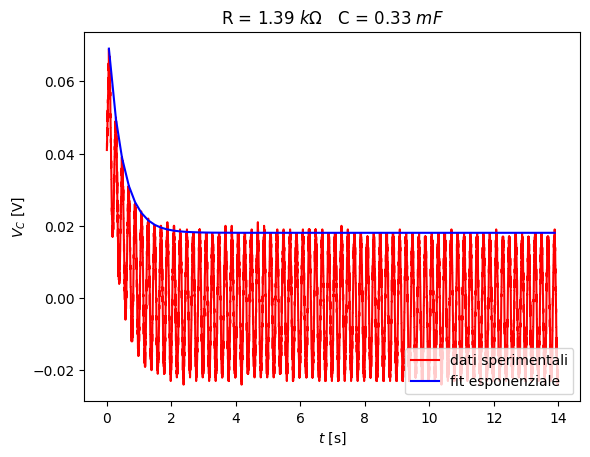

In [5]:
# R1 = 0.554 C1 = 3300 tau1 = 1.83
t1_max, Vc1_max = np.array(trova_massimi(t1,Vc1,0.0021))
print("Tau teorico 1 = " + str(round(tau[0],2)) + " +- " + str(round(err_tau[0],2)) + " s")
plot1 = plot_RC_fit(t1,Vc1,t1_max,Vc1_max,[1.83,1,0],0,True)

#R2 = 82 + 119 C2 = 10  tau2 = 2.01
t2_max, Vc2_max = np.array(trova_massimi(t2,Vc2,0.009))
print("tau = " + str(round(tau[1],2)) + " +- " + str(round(err_tau[1],2)) + " s")
plot2 = plot_RC_fit(t2,Vc2,t2_max,Vc2_max,[2.01,1,0],1)

#R3 = 119.35 C3 = 10  tau3 = 1.19
t3_max, Vc3_max = np.array(trova_massimi(t3,Vc3,0.008))
print("tau = " + str(round(tau[2],2)) + " +- " + str(round(err_tau[2],2)) + " s")
plot3 = plot_RC_fit(t3,Vc3,t3_max,Vc3_max,[1.19,1,0],2)

#R4 = 31.22 C4 = 640  tau4 = 19.98
t4_max, Vc4_max = np.array(trova_massimi(t4,Vc4,0.005))
print("tau = " + str(round(tau[3],2)) + " +- " + str(round(err_tau[3],2)) + " s")
plot4 = plot_RC_fit(t4,Vc4,t4_max,Vc4_max,[19.98,1,0],3)

#R5 = 29.20 C5 = 330  tau5 = 9.64
t5_max, Vc5_max = np.array(trova_massimi(t5,Vc5,0.015))
print("tau = " + str(round(tau[4],2)) + " +- " + str(round(err_tau[4],2)) + " s")
plot5 = plot_RC_fit(t5,Vc5,t5_max,Vc5_max,[9.64,1,0],4)

#R6 = 1.390 C6 = 3300  tau6 = 4.59
t6_max, Vc6_max = np.array(trova_massimi(t6,Vc6,0.003))
print("tau = " + str(round(tau[5],2)) + " +- " + str(round(err_tau[5],2)) + " s")
plot6 = plot_RC_fit(t6,Vc6,t6_max,Vc6_max,[4.59,1,0],5)

#R7 = 1.390 C7 = 330  tau7 = 0.46
t7_max, Vc7_max = np.array(trova_massimi(t7,Vc7,0.009))
print("tau = " + str(round(tau[6],2)) + " +- " + str(round(err_tau[6],2)) + " s")
plot7 = plot_RC_fit(t7,Vc7,t7_max,Vc7_max,[0.46,1,0],6)



# Confronto Tau sperimentali e teorici 

In [ ]:
# Rk = np.array([0.554, 201.7 ,119.35 ,1.390, 1.390 ,31.22])
# Ck = np.array([3300,10,10,3300,330,640])/1000
# err_Rk = [0.001,0.1,0.01,0.001,0.001,0.01] #1 ohm
# err_Ck = Ck/10
# tauk = Rk*Ck
# err_tauk = (err_Rk/Rk) + (err_Ck/Ck)

# Tau_sperimentale = np.array([2.23162156,2.49907383, 1.56243818,  5.68445474 , 0.45294588, 26.28854943])
# err_Tau_sperimentale = np.array([2.01833049e-03,4.46904203e-03,1.60666334e-02,5.45681932e-03,6.85655845e-02,1.04025416e-03])
# DeltaTau = Tau_sperimentale-tauk
# err_delta_tau = err_tauk + err_Tau_sperimentale

# fit_tauk = linear_fit(tauk, DeltaTau)
# m1, q1 = fit_tauk

# fit_Tau_sperimentale = linear_fit(Tau_sperimentale, DeltaTau)
# m2, q2 = fit_Tau_sperimentale


# tauk_fit = np.linspace(0,5.5, 1000)
# Tau_sperimentale_fit = np.linspace(0, 5.8, 1000)

# tau_plot = plot_linear_fit(tauk, DeltaTau, m1, q1,Tau_sperimentale,DeltaTau,m2,q2 ,r"$\tau$ [s]", r"$\Delta$$\tau$ [s]", \
#                            err_tauk, err_delta_tau, err_Tau_sperimentale, err_delta_tau, tauk_fit, Tau_sperimentale_fit)  

# Funzione di trasferimento condensatore  (R=3 komh C=10 microfarad)

m = 2.645428878914226e-05 +- 4.29887605674812e-05
q = 0.9331103287830236 +- 0.000358362579972886
m = -3.961206162683695e-05 +- 4.093699121557399e-05
q = -0.9508237143728988 +- 0.00035804570725998086
Av = 0.9419670215779612 +- 0.0003582041436164334|1.23 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV1,23hz.csv


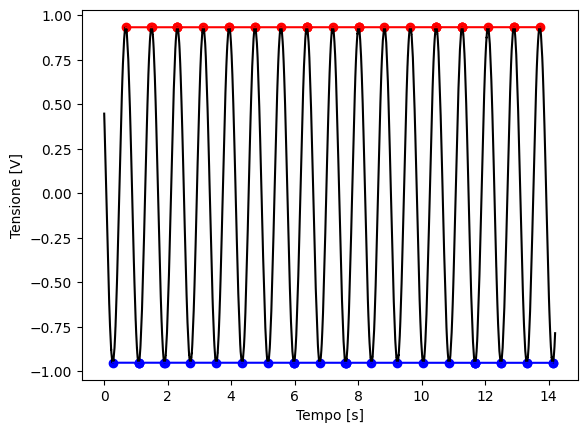

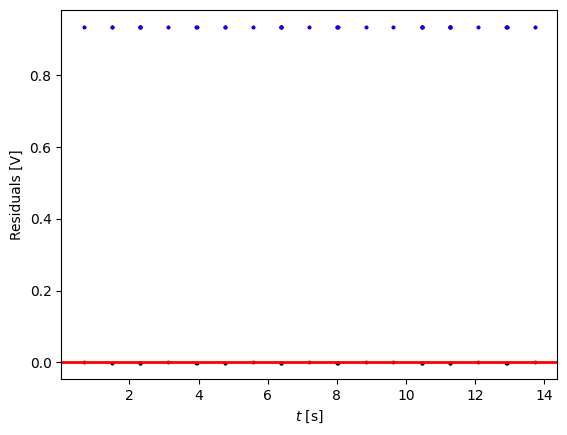

Somma dei residui = -3.574918139293004e-14
m = 8.395458686424049e-05 +- 6.635994866649508e-05
q = 0.8839318274588434 +- 0.00038935661911665214
m = 5.524657365086663e-05 +- 5.714581398157212e-05
q = -0.8992042867452064 +- 0.00035147985008476736
Av = 0.8915680571020248 +- 0.00037041823460070975|1.8 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV1,80hz.csv


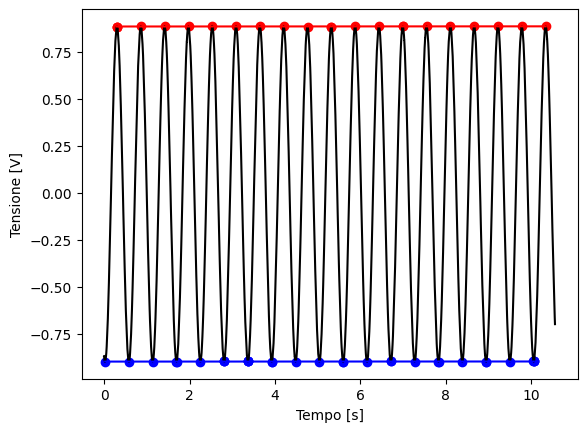

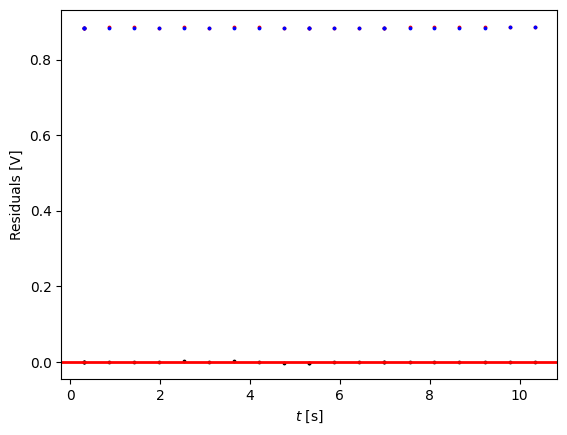

Somma dei residui = 3.2862601528904634e-14
m = 0.0005104700836850995 +- 0.0013095409328917349
q = 0.34712160338095566 +- 0.0006372940035909824
m = 0.003045671475685433 +- 0.0013106518551306312
q = -0.36474754012188293 +- 0.000693887874740381
Av = 0.3559345717514193 +- 0.0006655909391656816|10.16 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV10.16hz.csv


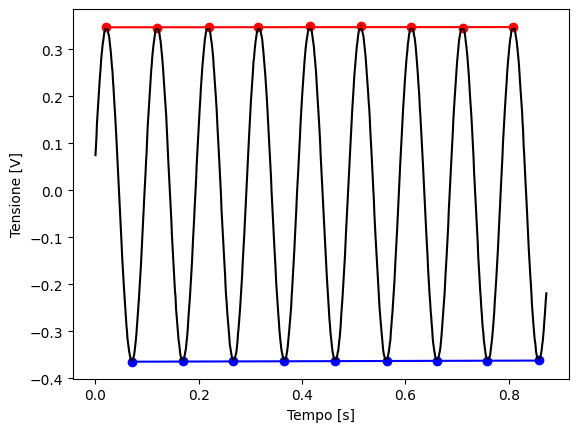

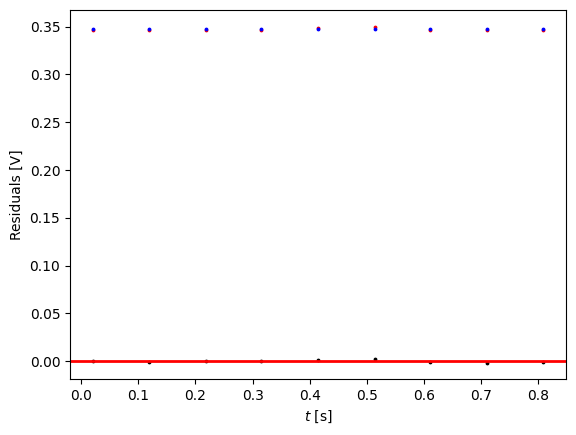

Somma dei residui = -1.5250997631444108e-08
m = 0.0001969485279663922 +- 0.001191204369089147
q = 0.32901625748587837 +- 0.0005971135537751618
m = 0.002341414775455074 +- 0.0013974270115779967
q = -0.3446633288894269 +- 0.0006818682741350858
Av = 0.33683979318765267 +- 0.0006394909139551238|10.82 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV10.82hz.csv


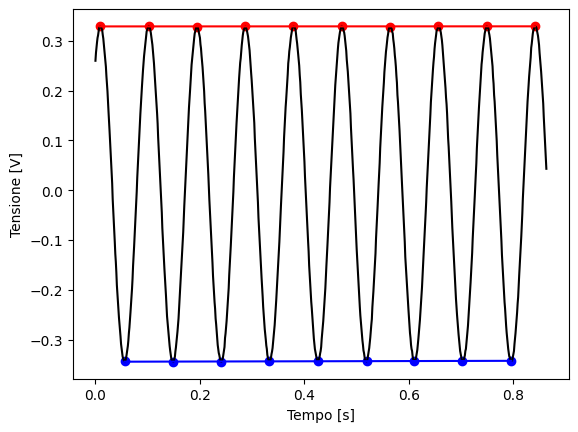

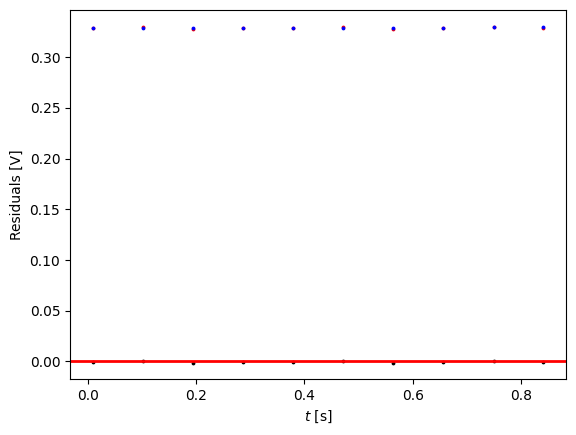

Somma dei residui = 3.03368441478824e-13
m = 0.0003132983693355215 +- 0.00074466480053841
q = 0.03602339252045582 +- 0.0002565484892799123
m = -0.0022229021396511974 +- 0.0007643367590141227
q = -0.044202547086641286 +- 0.00026218488344162345
Av = 0.04011296980354855 +- 0.0002593666863607679|100.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV100hz.csv


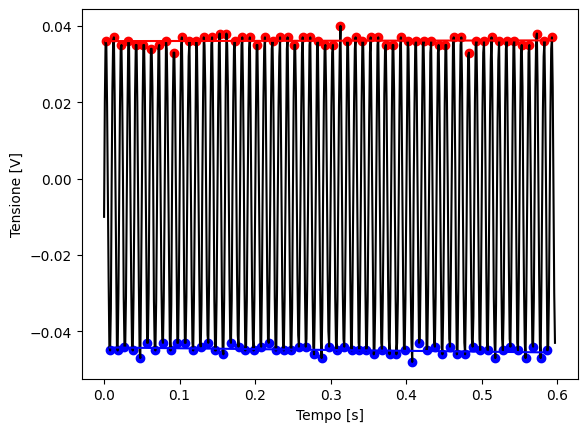

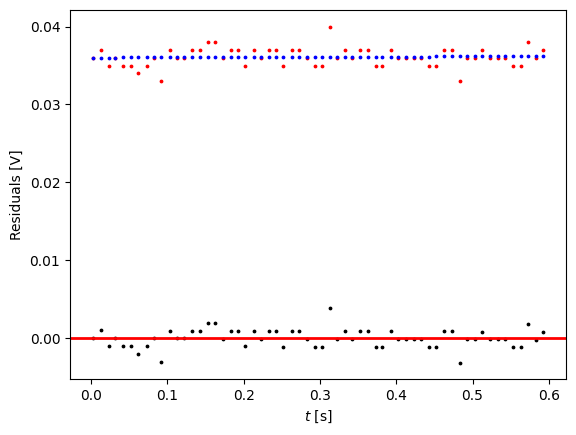

Somma dei residui = 1.210420652597577e-12
m = -0.00016563308296776332 +- 0.00031431152483120536
q = 0.31694057981239054 +- 0.00039676993433131045
m = -0.0006277683379410045 +- 0.0003253450831585767
q = -0.3292236236146352 +- 0.00039472926570348674
Av = 0.32308210171351287 +- 0.0003957496000173986|11.34 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV11.34hz.csv


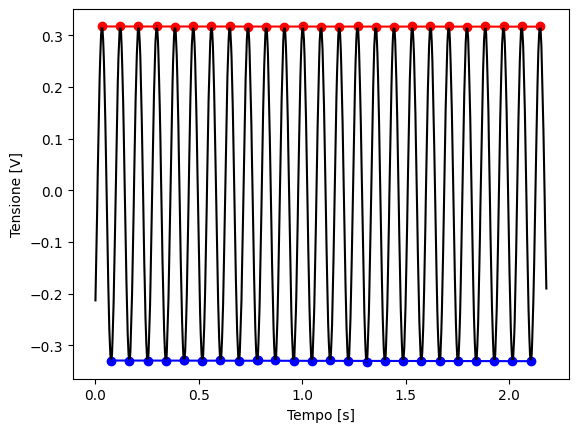

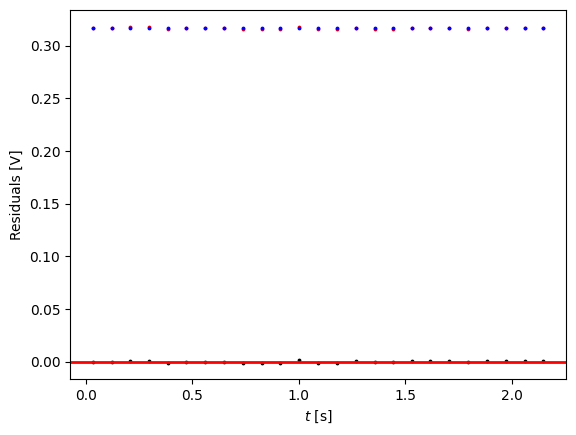

Somma dei residui = -3.940736625906993e-13
m = -0.0005761178332745429 +- 0.0008652653620729771
q = 0.30549226256883594 +- 0.0004957082630764565
m = 0.0005226225241135084 +- 0.0009342908901712026
q = -0.32022818345546994 +- 0.0005985920139549485
Av = 0.31286022301215294 +- 0.0005471501385157025|11.78 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV11.78hz.csv


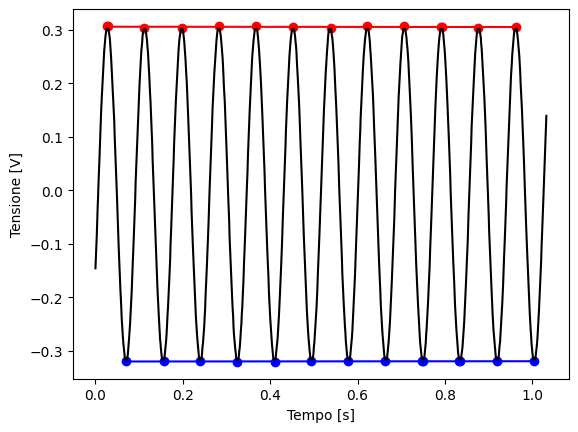

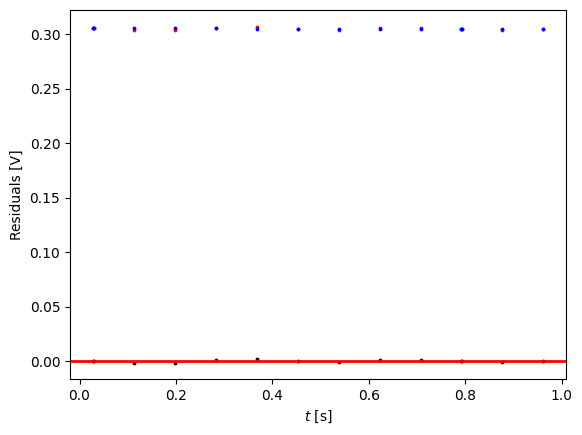

Somma dei residui = 6.63358257213531e-14
m = -0.0006302994548328389 +- 0.0016161039631366297
q = 0.28869110163110245 +- 0.000714902674216337
m = 0.0005123197214975695 +- 0.00157091094070581
q = -0.30287203696247234 +- 0.0006150373687940846
Av = 0.2957815692967874 +- 0.0006649700215052108|12.52 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV12,52hz.csv


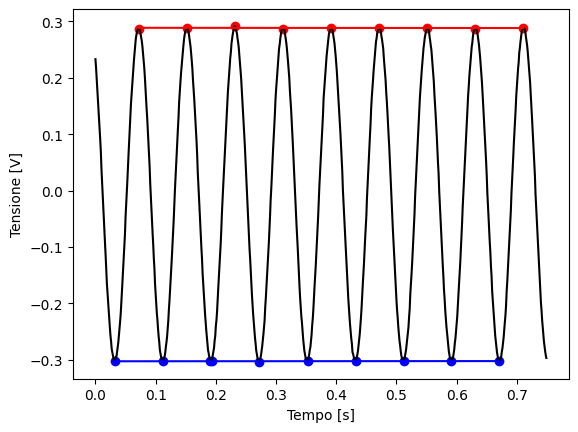

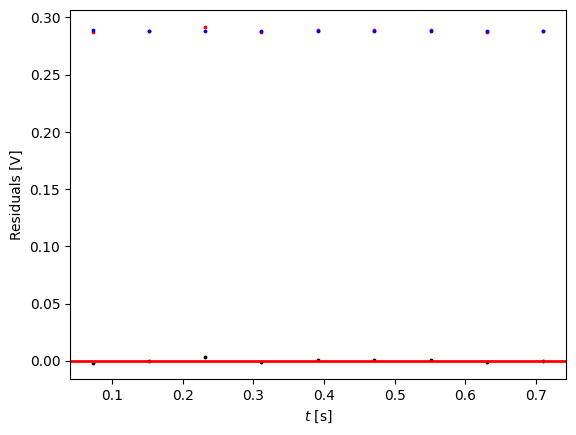

Somma dei residui = -9.43689570931383e-16
m = -0.0005162820707115824 +- 0.0007413605549710347
q = 0.029322077316835535 +- 0.00024170769503080547
m = -0.0013777612926605734 +- 0.0007413878671759984
q = -0.03897336419449311 +- 0.0002443788939674724
Av = 0.03414772075566432 +- 0.0002430432944991389|120.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV120hz.csv


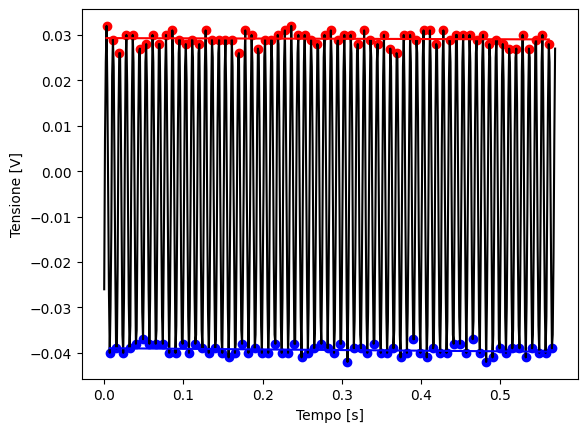

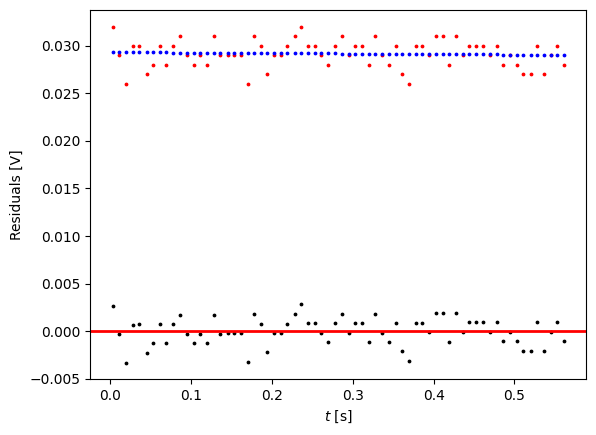

Somma dei residui = 7.290310716223658e-12
m = 4.601306737017641e-05 +- 0.0006926484639397642
q = 0.26961776698335715 +- 0.0005032647566485692
m = 0.0003759735746461379 +- 0.0007316663243268366
q = -0.282652251406168 +- 0.0004869861657613794
Av = 0.2761350091947626 +- 0.0004951254612049743|13.5 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV13.5hz.csv


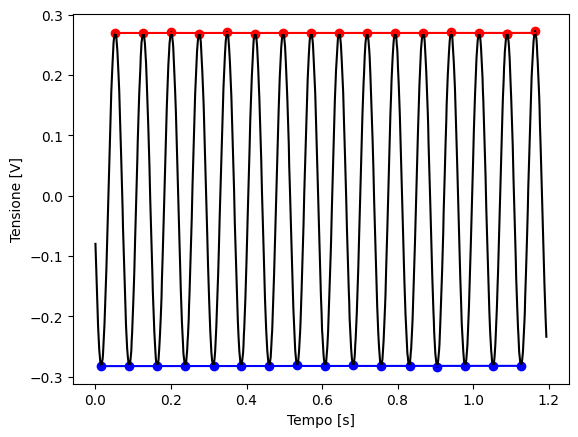

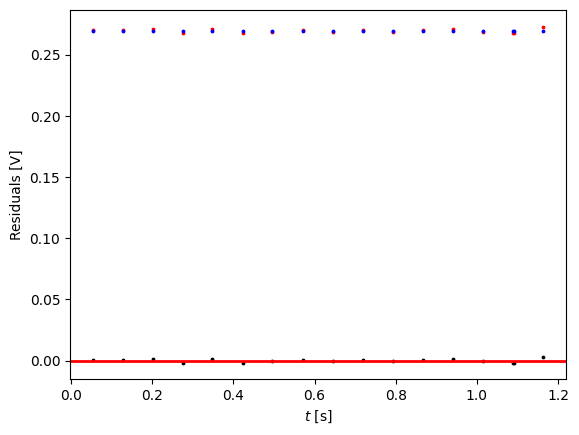

Somma dei residui = -3.8145218816953985e-08
m = -0.0001837322966034005 +- 0.0009056911322328228
q = 0.2616172984841615 +- 0.00048783211240975013
m = -0.0009876736613808796 +- 0.0009288173514696166
q = -0.27221085433945635 +- 0.0005436595981181383
Av = 0.2669140764118089 +- 0.0005157458552639443|14.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV14hz.csv


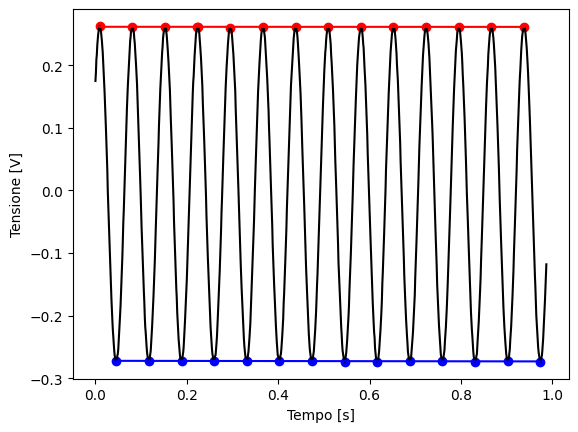

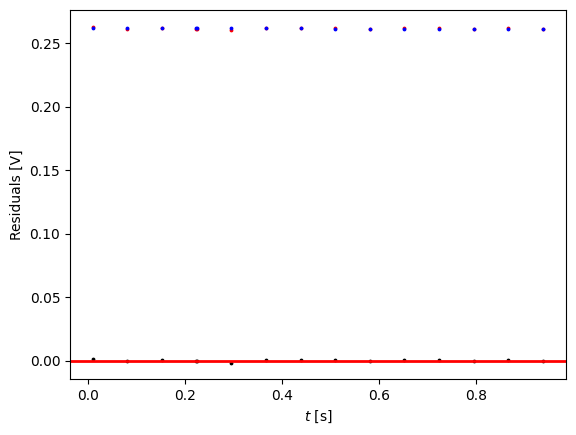

Somma dei residui = 7.630794163215882e-09
m = -0.0004468580907468645 +- 0.0005403444660226617
q = 0.24649327574435193 +- 0.00042624300596031864
m = -0.00027250418777808856 +- 0.0005401432285199678
q = -0.25866330154489675 +- 0.0004418664714255292
Av = 0.25257828864462434 +- 0.0004340547386929239|15.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV15hz.csv


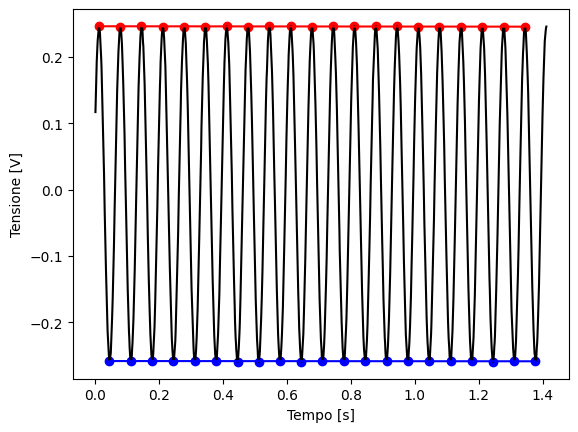

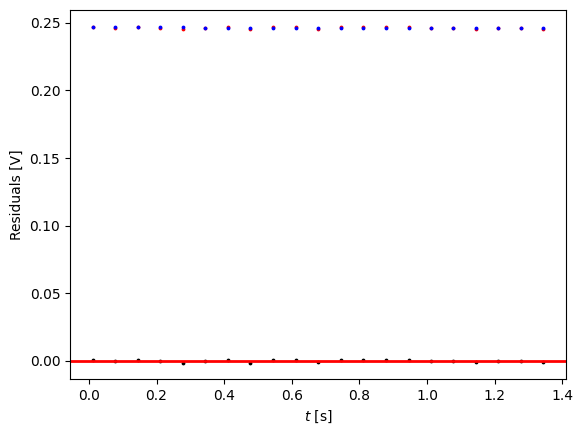

Somma dei residui = -6.264433416447446e-14
m = -0.0007031223772582081 +- 0.00021184026222723592
q = 0.2312803968320446 +- 0.0003103480351305197
m = -0.0005860585450328158 +- 0.0002275327363707552
q = -0.24155753264896507 +- 0.00032367321287811234
Av = 0.23641896474050483 +- 0.00031701062400431605|16.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV16hz.csv


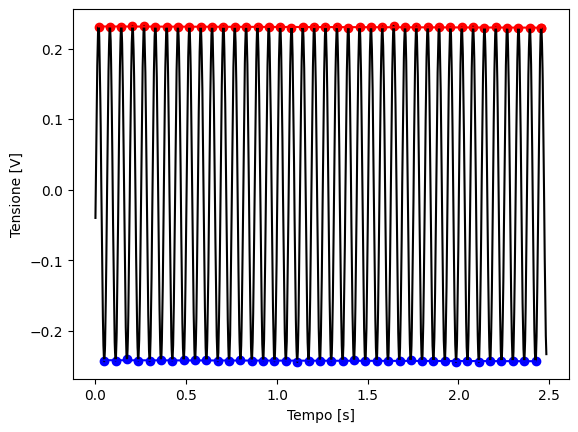

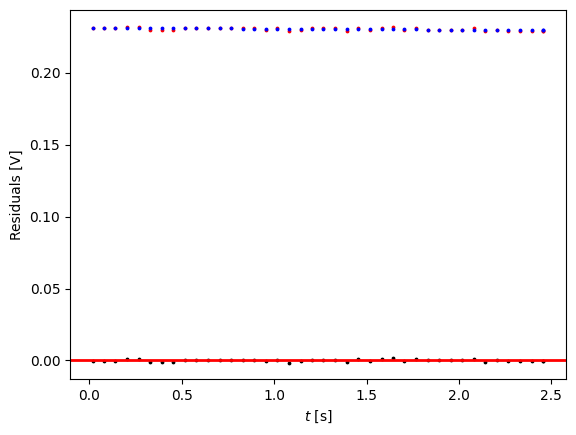

Somma dei residui = 1.3644640972643174e-13
m = 0.00135946445677948 +- 0.001870641163748433
q = 0.2181352534005392 +- 0.0005932087158853075
m = 0.0009262273742709736 +- 0.001872380660403385
q = -0.22997564526658404 +- 0.000640698701867396
Av = 0.2240554493335616 +- 0.0006169537088763518|17.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV17hz.csv


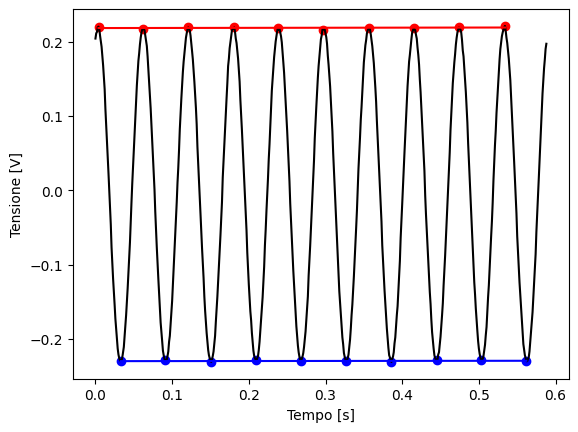

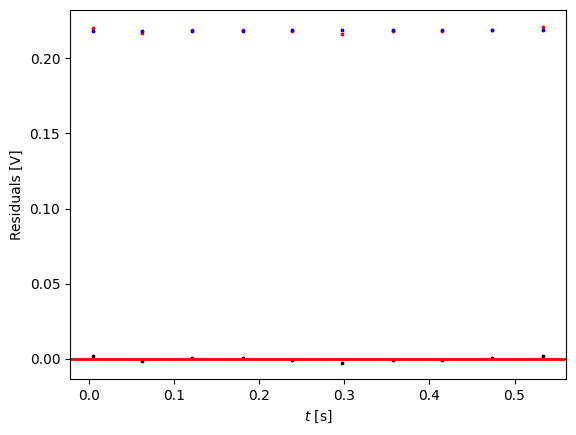

Somma dei residui = 2.2857068793236124e-08
m = -0.0003513862947865699 +- 0.00044480839537946565
q = 0.207592422161356 +- 0.00038026655979613987
m = -0.0006334272883897242 +- 0.0004706899818484197
q = -0.2181097948143289 +- 0.00039868624785680966
Av = 0.21285110848784244 +- 0.0003894764038264748|18.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV18hz.csv


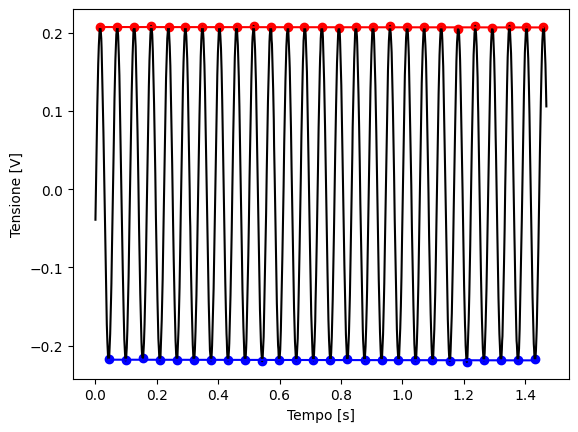

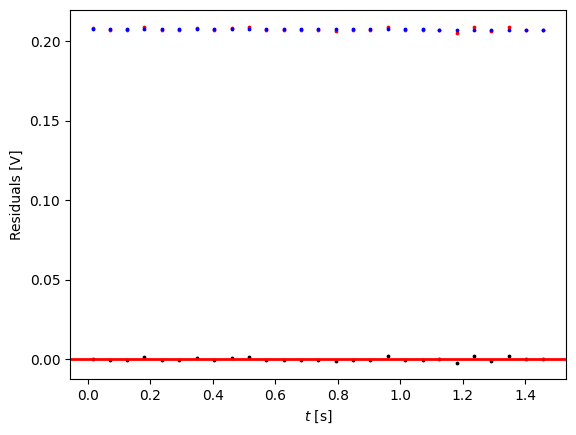

Somma dei residui = -1.5265566588595902e-15
m = 0.0007923307147736457 +- 0.0009396596248215394
q = 0.19745421008331054 +- 0.0005006599436724018
m = 0.0005547483107181539 +- 0.0009405817048450016
q = -0.20794974318386159 +- 0.00047935392326338617
Av = 0.20270197663358608 +- 0.000490006933467894|19.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV19hz.csv


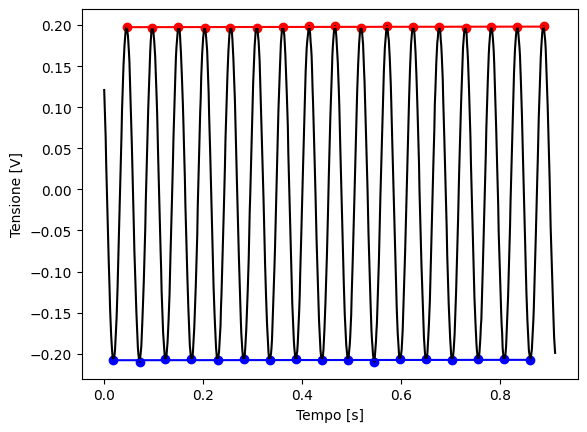

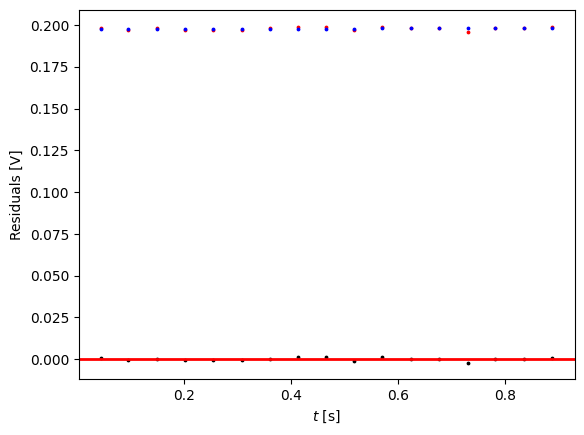

Somma dei residui = -1.4549472737712676e-13
m = 0.00022493911196452536 +- 6.630579402492315e-05
q = 0.9504675148696996 +- 0.00042574639422018526
m = 0.00015805562227126624 +- 7.847523944938062e-05
q = -0.9681326332328245 +- 0.000494655757988095
Av = 0.959300074051262 +- 0.00046020107610414017|1.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV1hz.csv


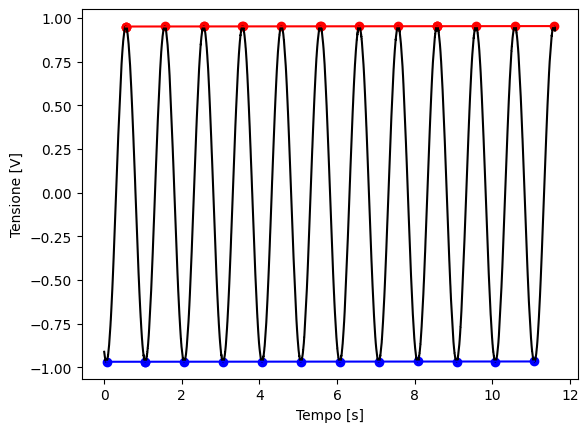

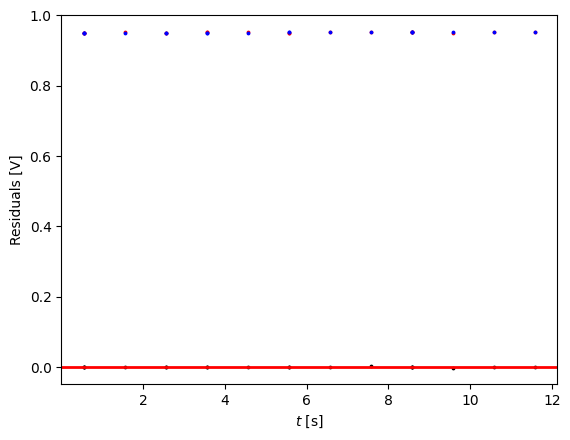

Somma dei residui = 4.440892098500626e-16
m = -0.00016892515258067257 +- 6.214904429368808e-05
q = 0.8617567016636942 +- 0.0004228457353999578
m = -4.6018867038714865e-05 +- 5.460397810514554e-05
q = -0.8756975820747782 +- 0.0003350978745214563
Av = 0.8687271418692362 +- 0.00037897180496070706|2.05 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV2.05hz.csv


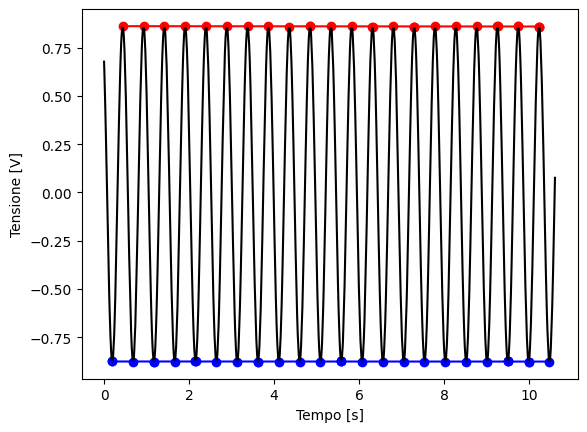

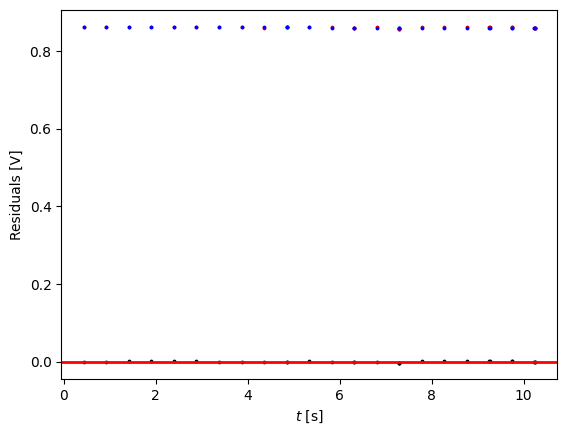

Somma dei residui = -7.238654120556021e-14
m = -1.074125899091455e-05 +- 5.031558958881116e-05
q = 0.8290774784387198 +- 0.00029625900840927875
m = -6.16810081233654e-05 +- 5.77078439358278e-05
q = -0.8434781367269746 +- 0.00034177075693799837
Av = 0.8362778075828472 +- 0.00031901488267363856|2.37 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV2.37hz.csv


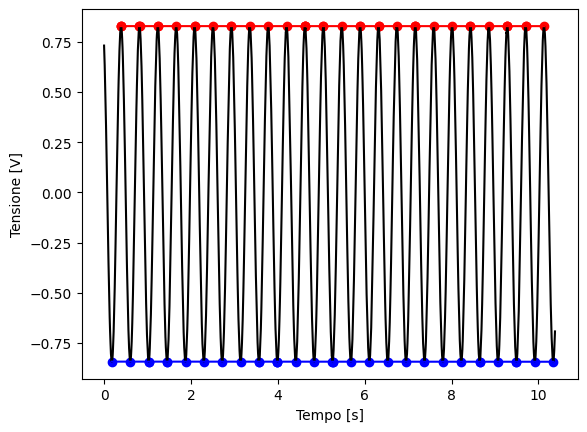

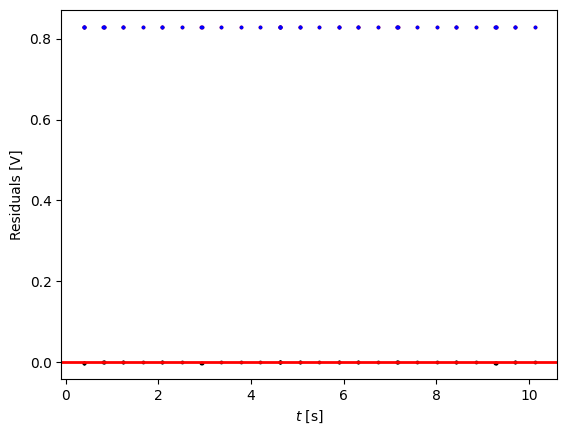

Somma dei residui = 4.268807529683727e-13
m = 7.086848288562233e-05 +- 5.811276059930724e-05
q = 0.7892951628450745 +- 0.00034158111296962474
m = 3.810165901019543e-05 +- 4.8154730476556434e-05
q = -0.8053147307451338 +- 0.00028940021005475195
Av = 0.7973049467951041 +- 0.0003154906615121883|2.76 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV2.76hz.csv


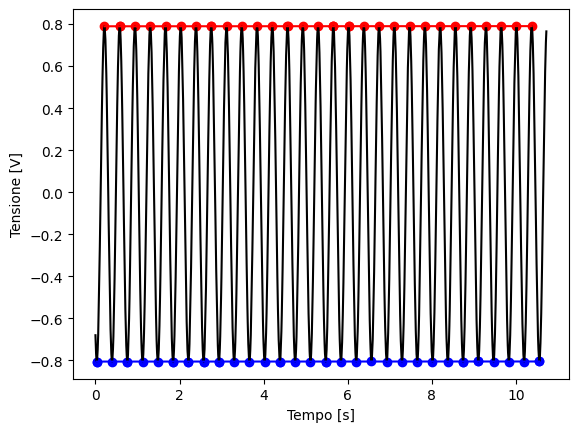

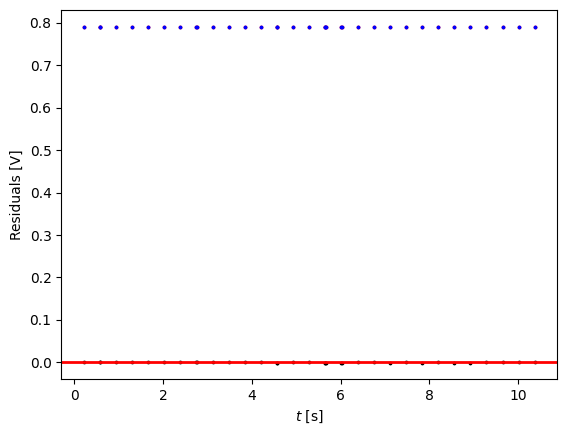

Somma dei residui = -3.519406988061746e-14
m = 0.0003489958369593183 +- 0.0009086932157678477
q = 0.18745138734973682 +- 0.0004780275092616663
m = 0.0005143597947913981 +- 0.0009081121817159977
q = -0.1992781304689849 +- 0.000458228206784052
Av = 0.19336475890936086 +- 0.0004681278580228592|20.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV20hz.csv


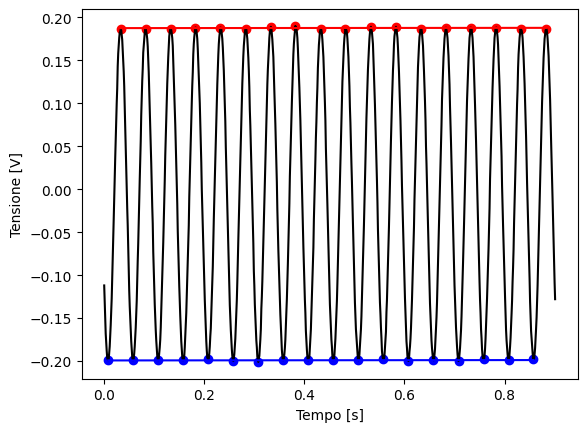

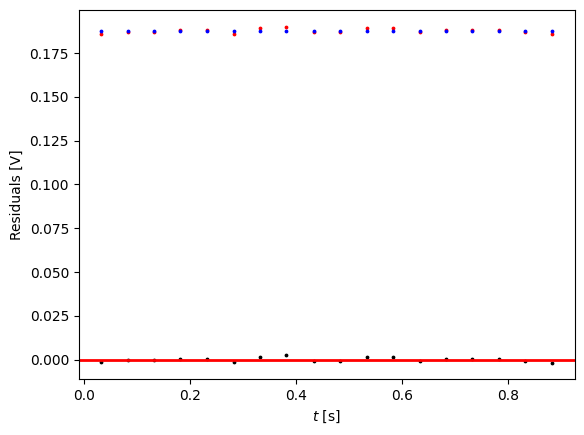

Somma dei residui = -1.3355982986240633e-13
m = -0.0012254897499729203 +- 0.0007571303219649537
q = 0.1808713816549775 +- 0.00044799613186532897
m = -0.0015547233486849427 +- 0.000705894730880022
q = -0.1887876118043404 +- 0.00042246587900196774
Av = 0.18482949672965893 +- 0.00043523100543364833|21.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV21hz.csv


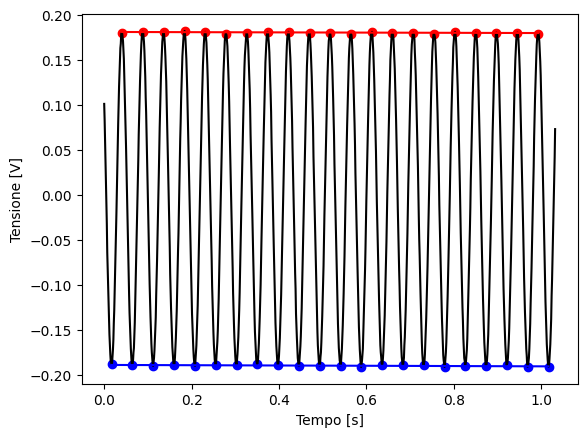

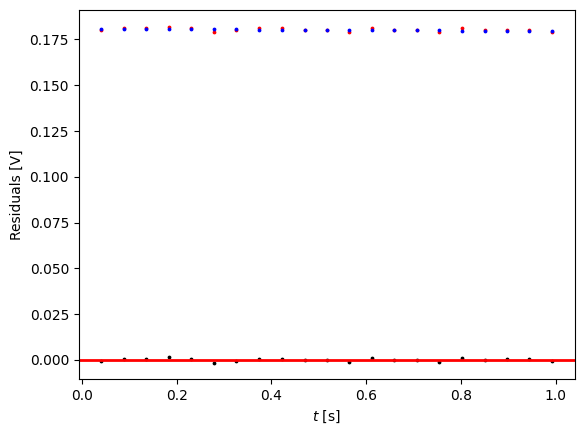

Somma dei residui = 1.217881351323058e-11
m = 0.0007253191038827024 +- 0.0005433888496552344
q = 0.17244077600104382 +- 0.00038696353043130434
m = 0.0009025551127683676 +- 0.0005143887727546686
q = -0.18277177466698855 +- 0.00036968187182127334
Av = 0.17760627533401618 +- 0.0003783227011262888|22.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV22hz.csv


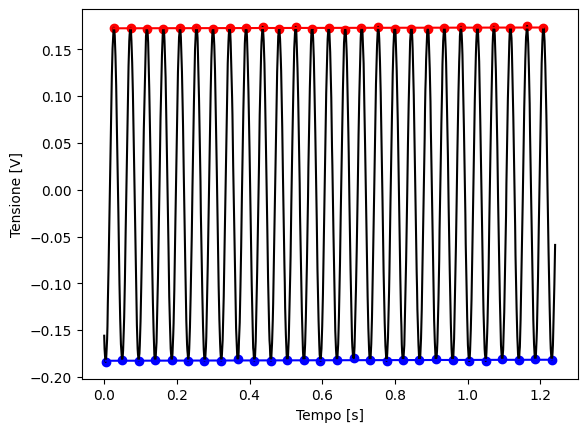

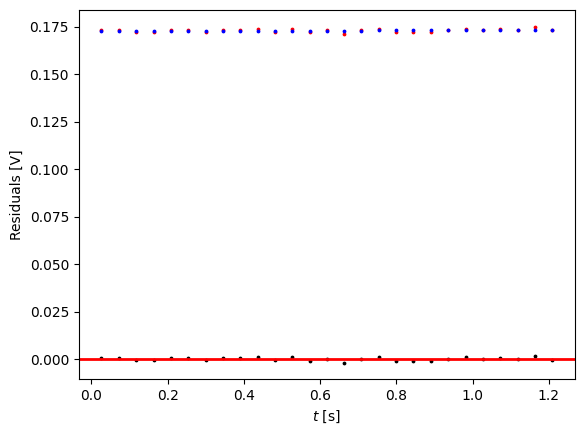

Somma dei residui = -5.08759701034478e-14
m = -0.0008609288808750566 +- 0.00042051354961370304
q = 0.16713439417928624 +- 0.0003489806131452697
m = -0.0011994556682766197 +- 0.0004203682130875557
q = -0.17386867006594733 +- 0.00035686782184295136
Av = 0.1705015321226168 +- 0.0003529242174941105|23.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV23hz.csv


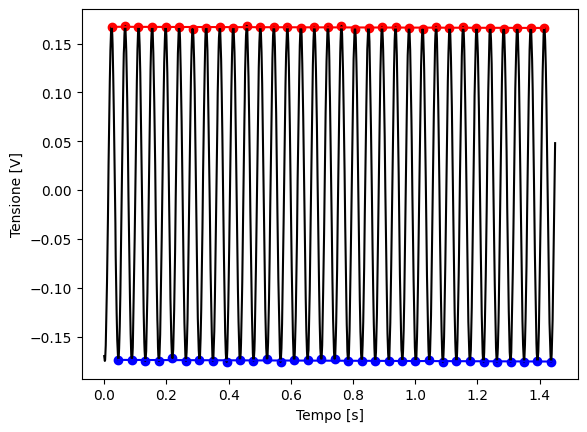

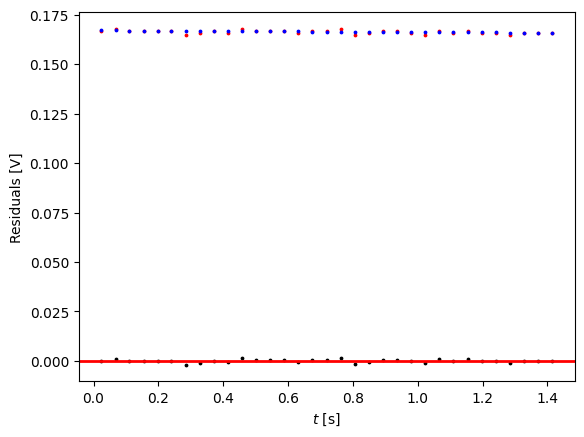

Somma dei residui = 4.6074255521944e-15
m = 0.0014019168554047488 +- 0.0008645033187633062
q = 0.15929646350540733 +- 0.00043396793378667434
m = 0.000542586737053098 +- 0.0009309917519721939
q = -0.1684354826438856 +- 0.00046179754509392915
Av = 0.16386597307464645 +- 0.0004478827394403018|24.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV24hz.csv


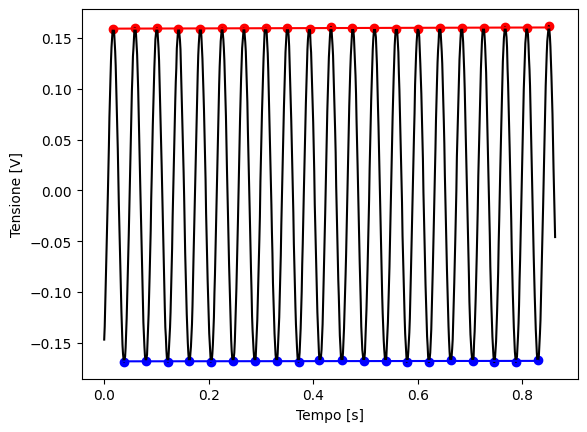

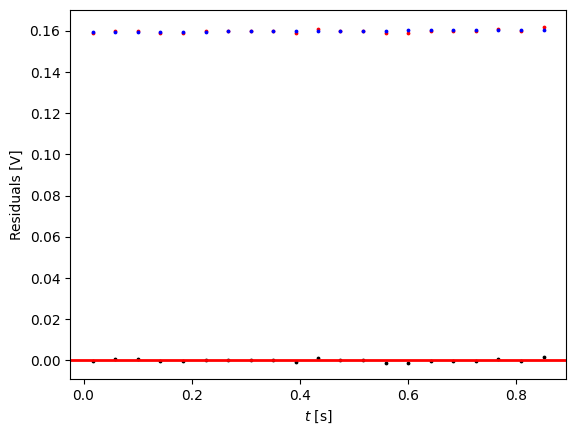

Somma dei residui = -1.8318679906315083e-15
m = 0.0001967889649610033 +- 0.00025243691393262937
q = 0.1529684965957998 +- 0.0002878036986003421
m = -0.00031096187140974276 +- 0.00024495535465877906
q = -0.16311222859739058 +- 0.00028067449807438216
Av = 0.1580403625965952 +- 0.00028423909833736217|25.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV25hz.csv


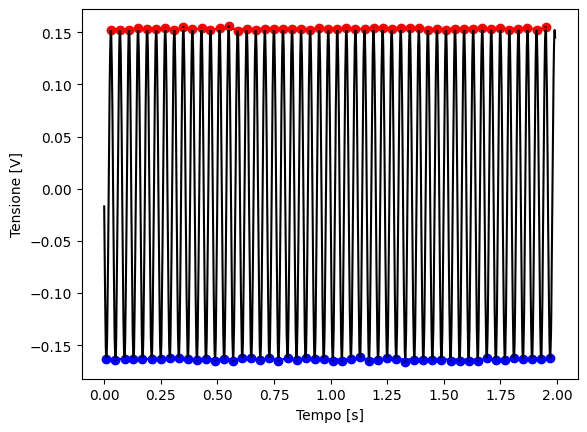

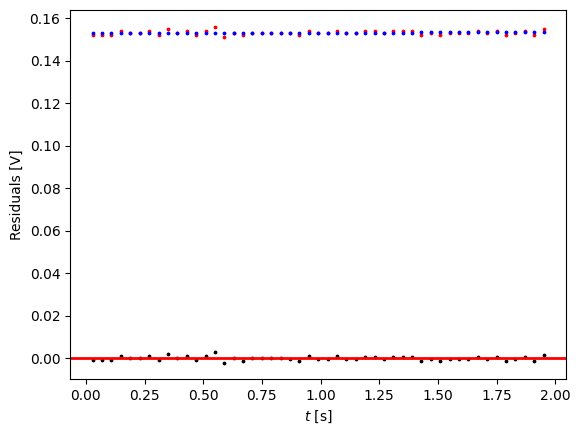

Somma dei residui = -7.627904474727387e-09
m = 0.0004152820314208399 +- 0.00028868050213088037
q = 0.14708200054187498 +- 0.0002991974414969828
m = 0.00048718236467577196 +- 0.00028865735742701203
q = -0.15747339551586456 +- 0.00029432175955594993
Av = 0.15227769802886976 +- 0.0002967596005264664|26.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV26hz.csv


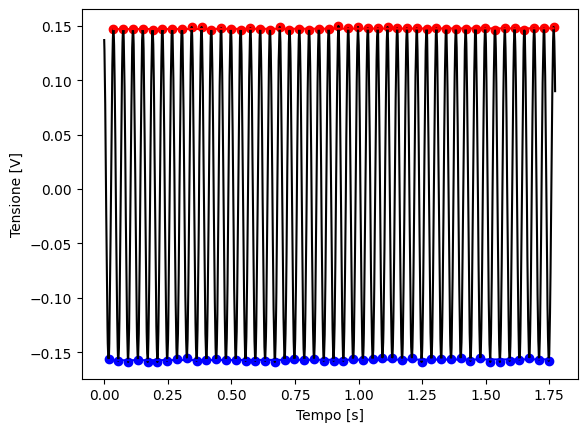

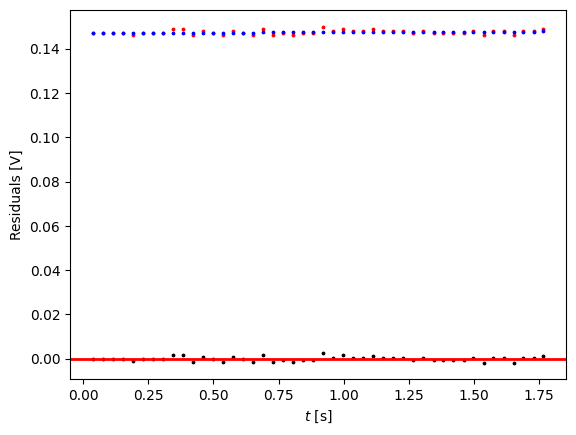

Somma dei residui = 2.57072141351955e-13
m = 0.0012180552043918815 +- 0.0008796081027087424
q = 0.13695375570676985 +- 0.0004323686352391517
m = 0.00048648465234900996 +- 0.000825871647392815
q = -0.14595949245341716 +- 0.00041005746632399756
Av = 0.14145662408009352 +- 0.0004212130507815746|28.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV28hz.csv


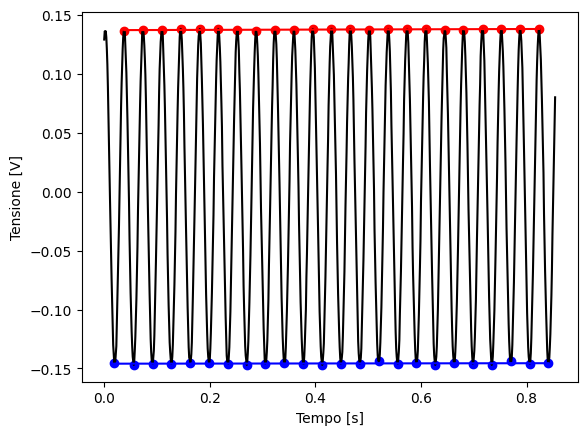

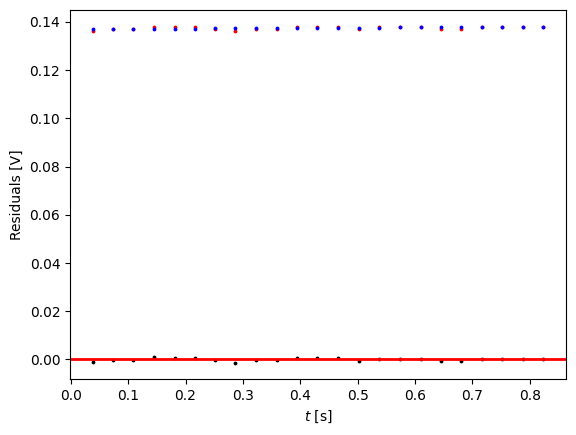

Somma dei residui = -3.4139358007223564e-15
m = 0.00012035766027240605 +- 0.00013853271219931563
q = 0.7476226592063324 +- 0.0004374716299761309
m = 0.0008080388376762201 +- 0.00014642153387066313
q = -0.7638499155965026 +- 0.00043677841386340044
Av = 0.7557362874014175 +- 0.0004371250219197657|3.18 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV3.18hz.csv


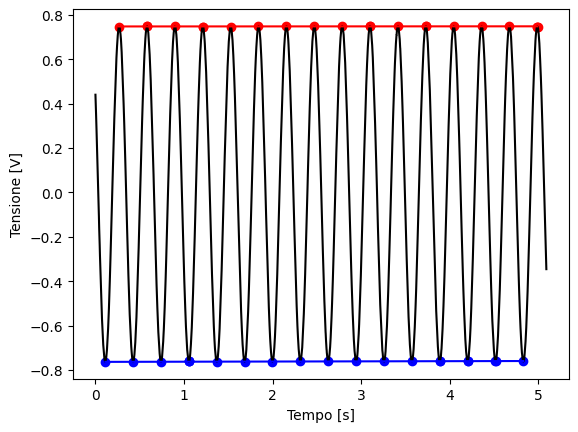

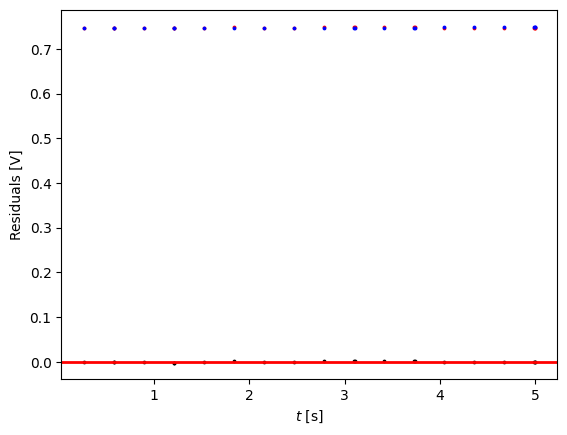

Somma dei residui = 2.609024107869118e-13
m = -0.000244163213866713 +- 0.0002509530582737636
q = 0.7094616363365929 +- 0.0005363077737894893
m = -9.46427758824806e-05 +- 0.000197318619671852
q = -0.718883326224461 +- 0.000393656992302644
Av = 0.714172481280527 +- 0.0004649823830460666|3.62 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV3.62hz.csv


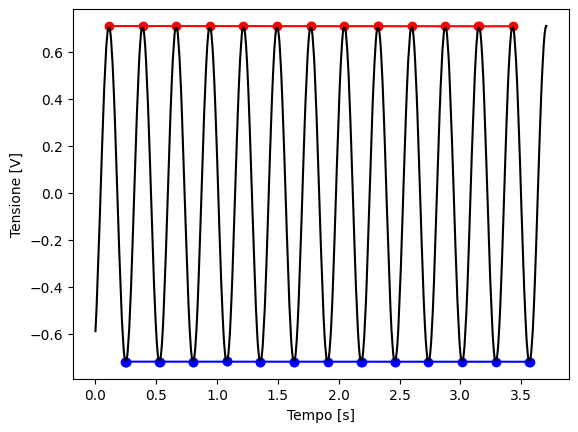

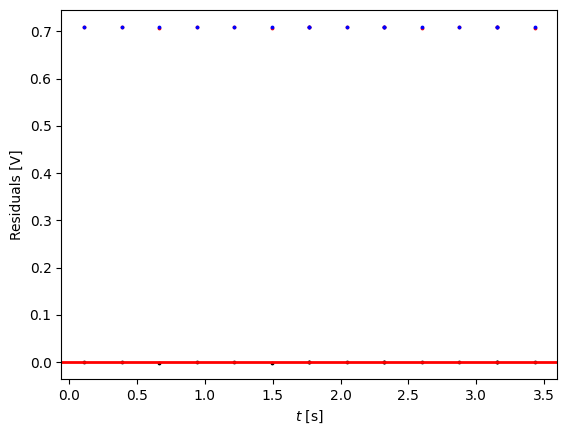

Somma dei residui = -2.804534382505608e-12
m = -0.001391173275709806 +- 0.0013633106227812692
q = 0.12893396877460825 +- 0.0004862272236705673
m = -0.0019536693548391254 +- 0.0012572863051676403
q = -0.13749561549448194 +- 0.0004544907603449509
Av = 0.1332147921345451 +- 0.00047035899200775907|30.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV30hz.csv


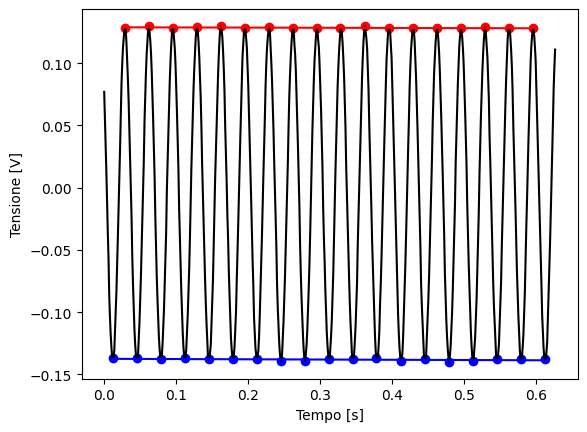

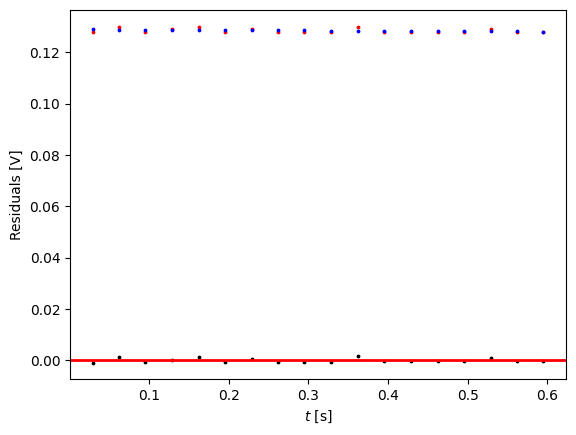

Somma dei residui = 1.6214807274650411e-13
m = 0.002400669541250208 +- 0.0010746978687754846
q = 0.11934217850358064 +- 0.00041455492884396347
m = 0.0014482099049970291 +- 0.00115379659415481
q = -0.13062166292239574 +- 0.00043947266123062483
Av = 0.12498192071298819 +- 0.00042701379503729415|32.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV32hz.csv


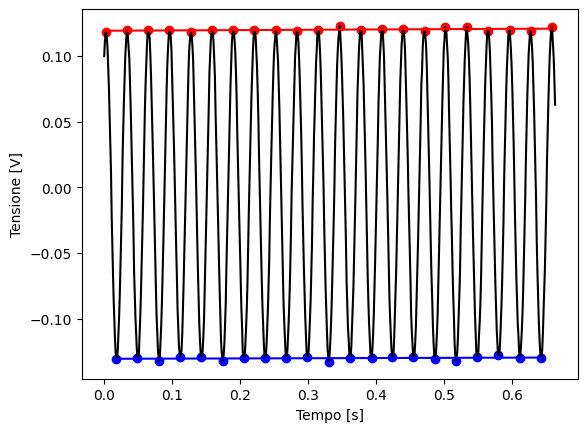

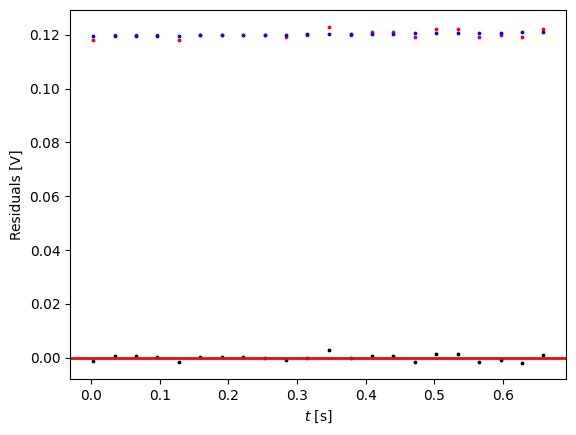

Somma dei residui = 6.7584826624056404e-15
m = 0.00010493101308904333 +- 0.0004836720110642408
q = 0.11224709061181024 +- 0.00032198045894505235
m = 0.0002768970490283211 +- 0.0004655835176442913
q = -0.12413493573552276 +- 0.00031195917574822717
Av = 0.1181910131736665 +- 0.00031696981734663976|34.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV34hz.csv


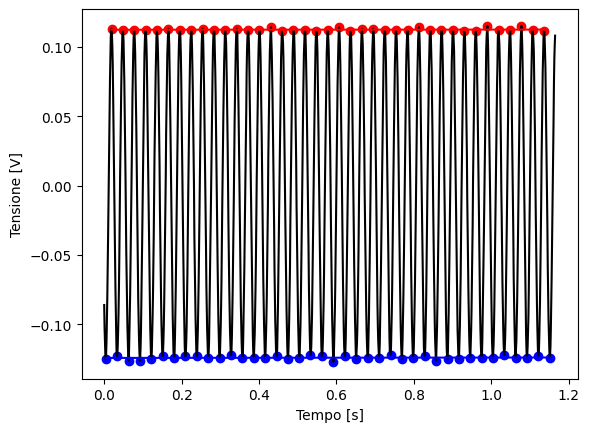

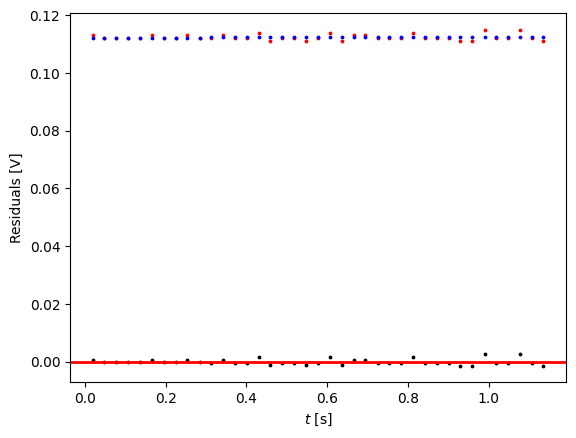

Somma dei residui = 5.833389327136729e-13
m = -0.0001089401930702838 +- 0.00022744299287511728
q = 0.10647515426632481 +- 0.00024554497097328674
m = 0.0005273595352261389 +- 0.00022240463118308873
q = -0.11731737835065435 +- 0.00024100448441093954
Av = 0.11189626630848959 +- 0.00024327472769211314|36.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV36hz.csv


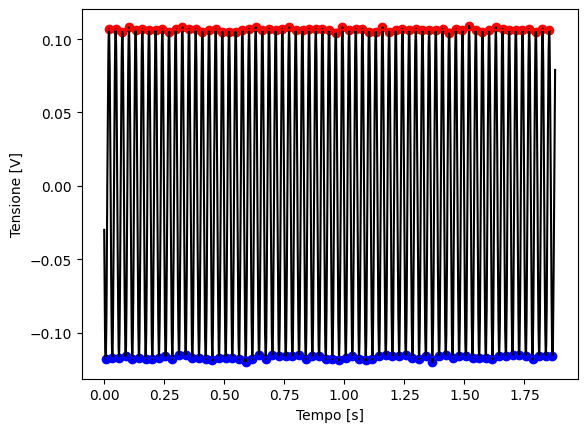

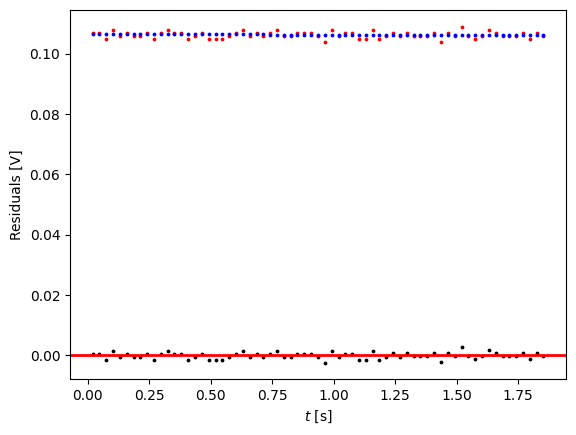

Somma dei residui = 7.630239287625962e-09
m = 0.0007510701916262941 +- 0.0010815126782045712
q = 0.09959043439673267 +- 0.00041127017408398934
m = 0.0004673767840563338 +- 0.0010203058801136118
q = -0.10657837184759526 +- 0.0003916548722979306
Av = 0.10308440312216396 +- 0.00040146252319095996|39.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV39hz.csv


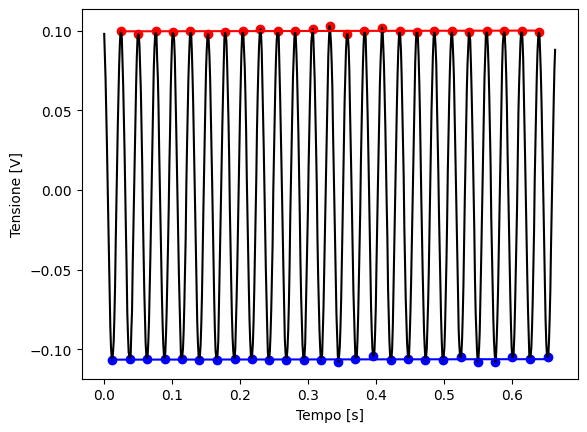

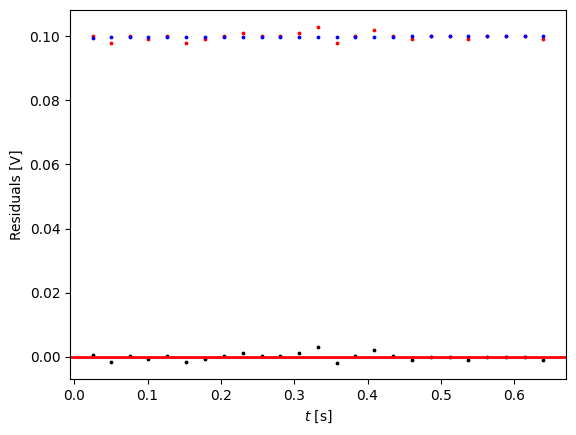

Somma dei residui = -1.5613899062572045e-13
m = -0.0006092077168260301 +- 0.0003737085385936581
q = 0.6327621454430186 +- 0.000593570055276269
m = -0.0004492464720813695 +- 0.00031673758675311955
q = -0.6479519754598703 +- 0.0004602061919581034
Av = 0.6403570604514444 +- 0.0005268881236171862|4.47 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV4,47hz.csv


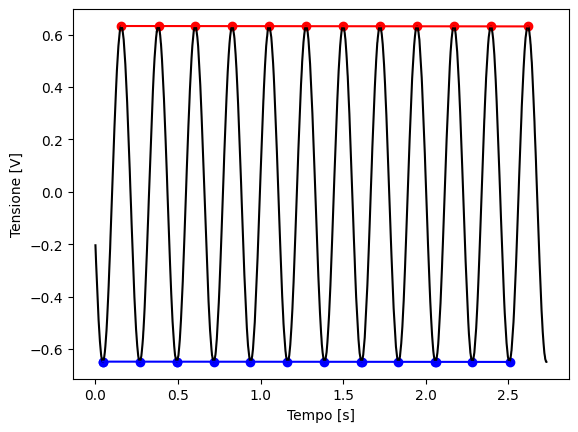

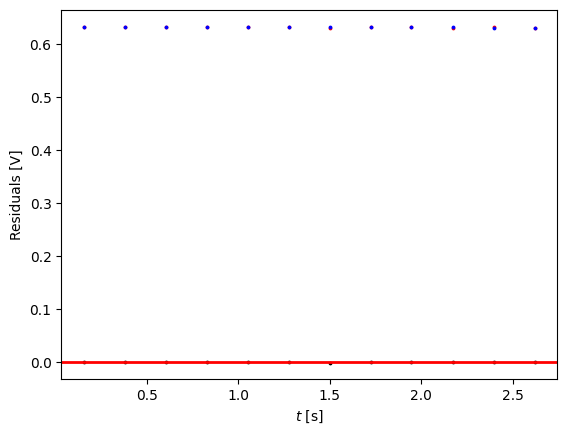

Somma dei residui = -2.0172752357439094e-13
m = 9.03135513502472e-05 +- 0.00019950726281822958
q = 0.6744653087874577 +- 0.0004652507701154467
m = 1.6878765215166958e-05 +- 0.00020670518510912067
q = -0.6866334672494898 +- 0.0004668009273291784
Av = 0.6805493880184738 +- 0.00046602584872231255|4.01 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV4.01hz.csv


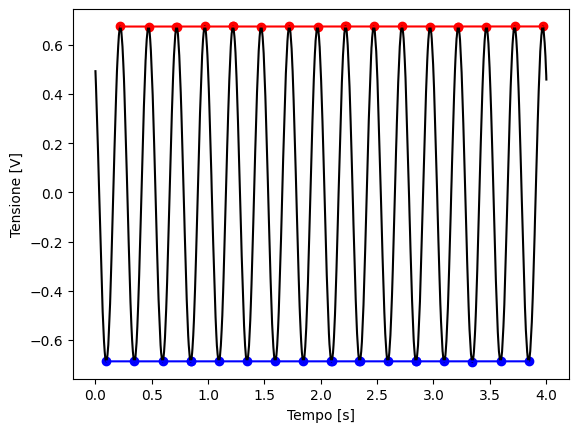

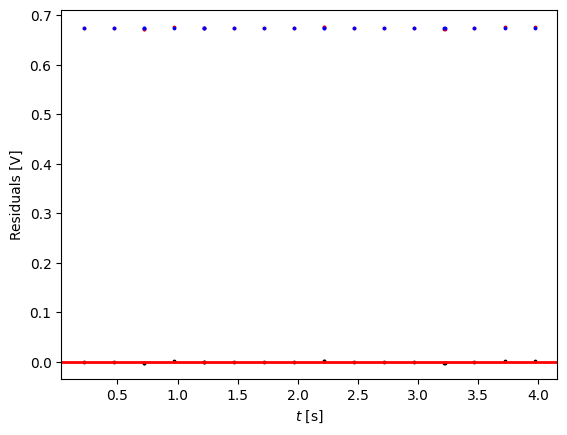

Somma dei residui = 6.219469383950127e-13
m = -3.6562301170609556e-05 +- 0.000291287676930207
q = 0.598617208628456 +- 0.0005024680324812705
m = 1.0284540498117778e-06 +- 0.0002861126693259586
q = -0.6138250716792428 +- 0.000493072781522371
Av = 0.6062211401538494 +- 0.0004977704070018207|4.91 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV4.91hz.csv


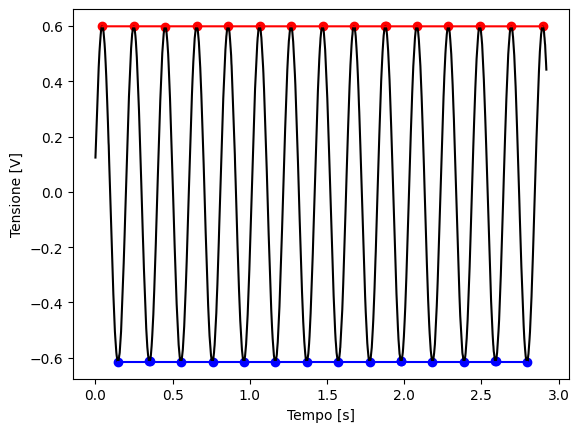

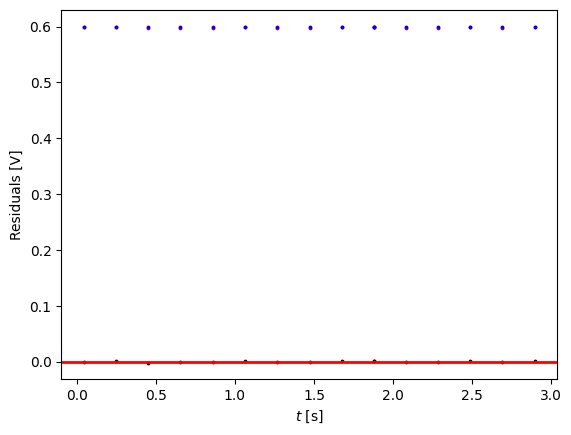

Somma dei residui = -2.9712898808043064e-12
m = 0.00036099190331744955 +- 0.0010983106079364385
q = 0.09215661517970272 +- 0.0003947878158807587
m = 0.0007870842764811092 +- 0.0010364711398484154
q = -0.10157878702251777 +- 0.00037618036183152513
Av = 0.09686770110111025 +- 0.0003854840888561419|42.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV42hz.csv


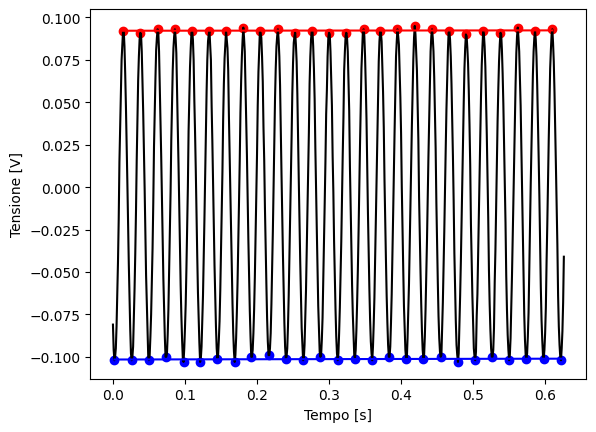

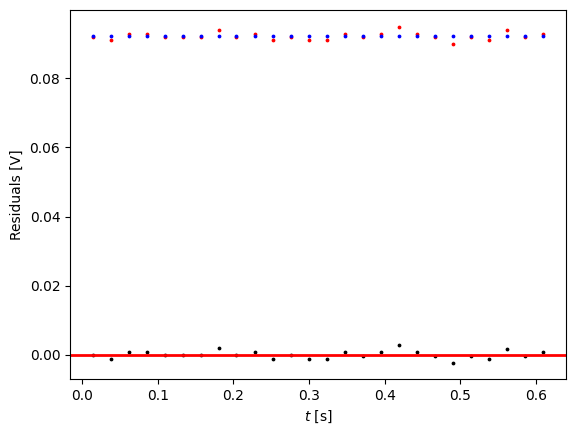

Somma dei residui = -7.864542350688453e-14
m = -0.0019537038712616472 +- 0.0033376164460347684
q = 0.0855305876325299 +- 0.0005824666160340932
m = -0.003942657496694085 +- 0.002982309956272365
q = -0.09453822245389461 +- 0.0005297220072627727
Av = 0.09003440504321225 +- 0.000556094311648433|45.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV45hz.csv


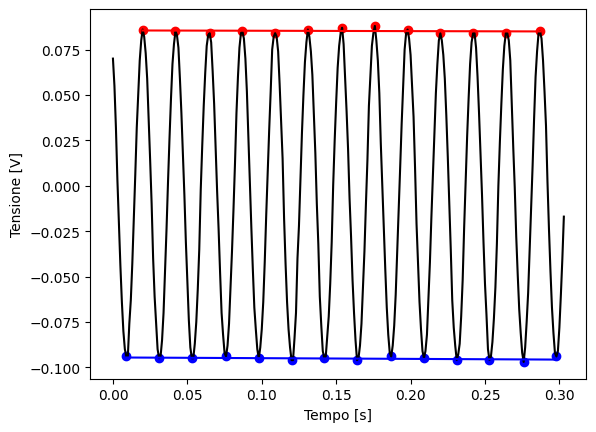

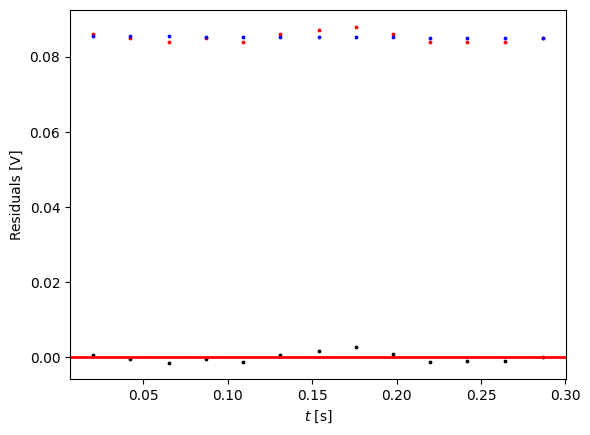

Somma dei residui = 2.783745456369502e-13
m = -0.00035353213829373214 +- 0.0003480641388955417
q = 0.5730695378172918 +- 0.0005294948597610873
m = -8.404079722579283e-06 +- 0.0003089297882897208
q = -0.5876928256912914 +- 0.0005377934781891358
Av = 0.5803811817542917 +- 0.0005336441689751116|5.28 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV5,28hz.csv


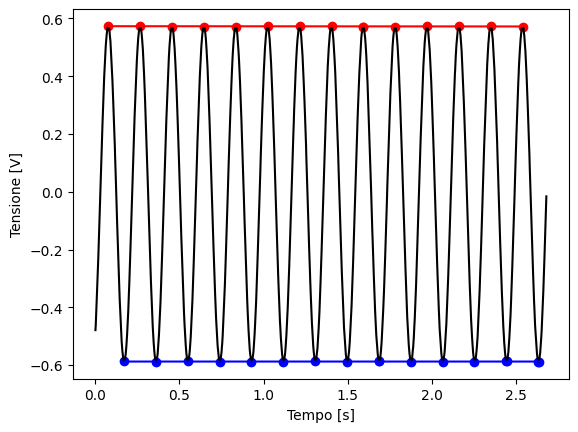

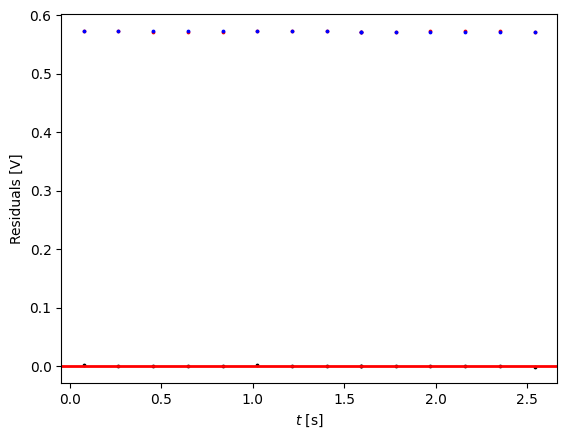

Somma dei residui = -2.893241202173158e-13
m = 0.0006424024470259801 +- 0.000533394712227081
q = 0.5433584724737388 +- 0.0005460244245756939
m = 0.0005848511549925196 +- 0.0006255704999614064
q = -0.5612249039116174 +- 0.0006443797507435181
Av = 0.552291688192678 +- 0.000595202087659606|5.69 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV5.69hz.csv


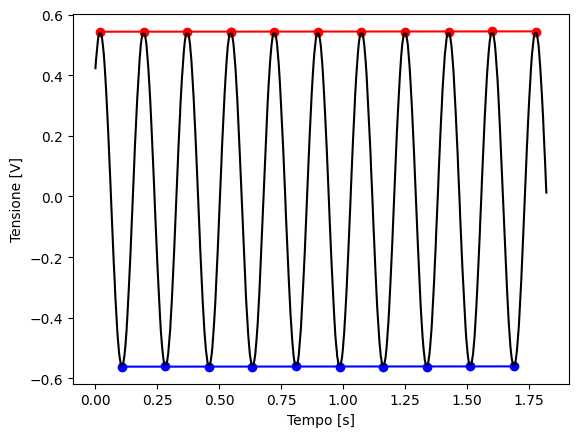

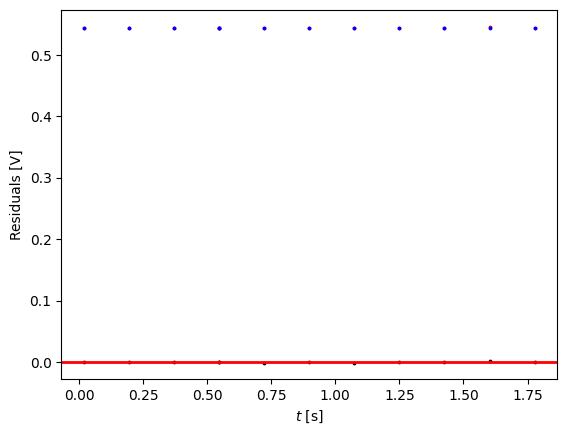

Somma dei residui = -5.10702591327572e-15
m = -1.2417747188298023e-05 +- 0.0006140659125011062
q = 0.07684259589049836 +- 0.0003068236640532931
m = -0.0003173995468843671 +- 0.0006142660005352173
q = -0.0856096894788978 +- 0.0003016746209647297
Av = 0.08122614268469808 +- 0.0003042491425090114|50.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV50hz.csv


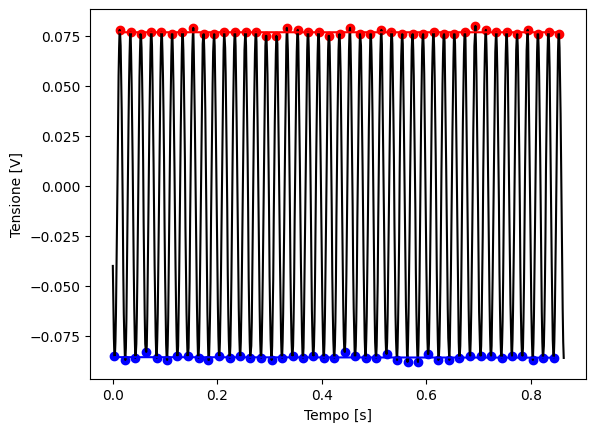

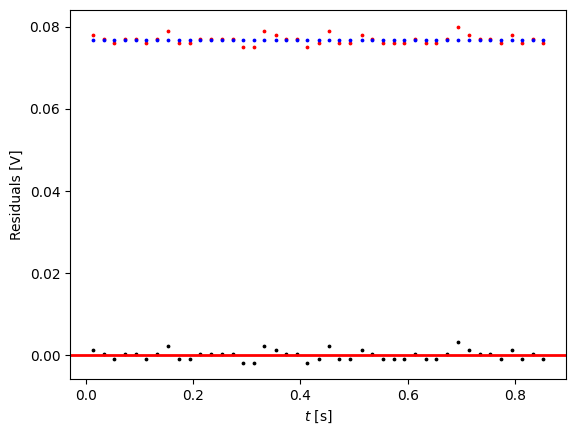

Somma dei residui = -1.0681285073088631e-07
m = -1.2417747188298023e-05 +- 0.0006140659125011062
q = 0.07684259589049836 +- 0.0003068236640532931
m = -0.0003173995468843671 +- 0.0006142660005352173
q = -0.0856096894788978 +- 0.0003016746209647297
Av = 0.08122614268469808 +- 0.0003042491425090114|55.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV55hz.csv


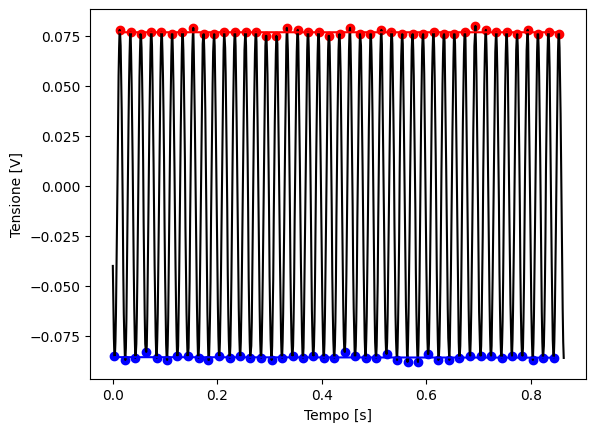

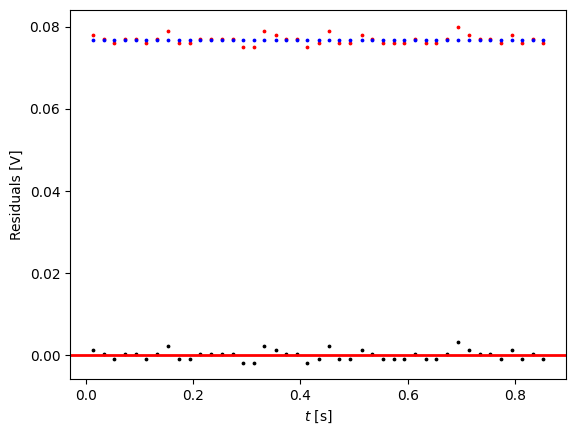

Somma dei residui = -1.0681285073088631e-07
m = -1.9544521898673395e-06 +- 0.0002617608698788366
q = 0.517835988477247 +- 0.0004106099073714631
m = -4.2002449007760845e-05 +- 0.00031707290086712873
q = -0.5325245073675255 +- 0.0004706911955052751
Av = 0.5251802479223863 +- 0.0004406505514383691|6.12 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV6,12hz.csv


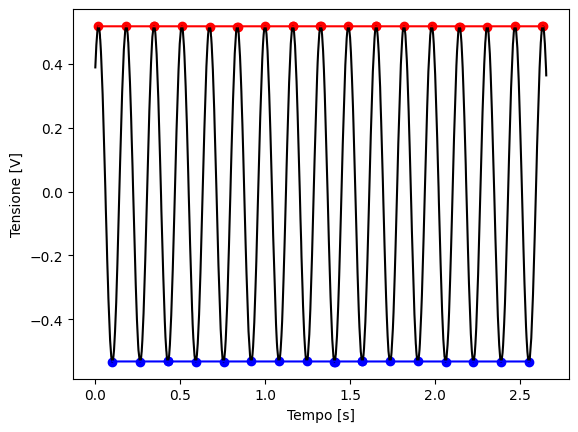

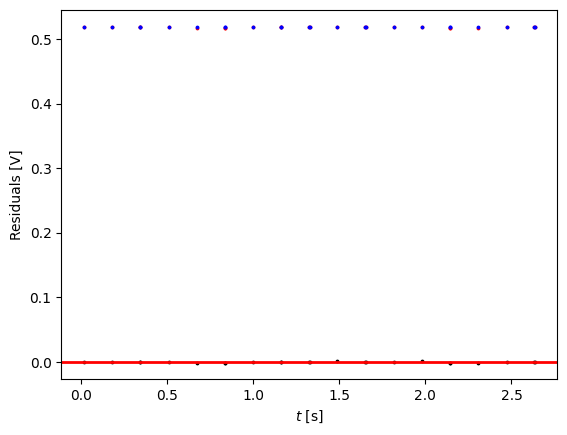

Somma dei residui = 9.918233301320356e-08
m = -3.2869534309944176e-05 +- 0.00023263367946105656
q = 0.4799598768482012 +- 0.0003915933189442811
m = -0.00015382382564225957 +- 0.00022615408172851987
q = -0.4968437206782682 +- 0.0004071477421461478
Av = 0.4884017987632347 +- 0.00039937053054521444|6.78 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV6,78hz.csv


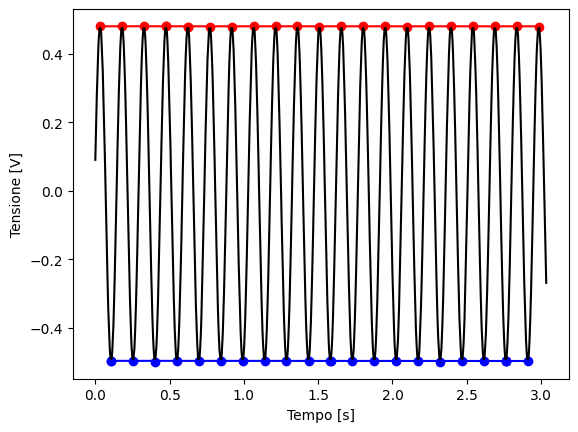

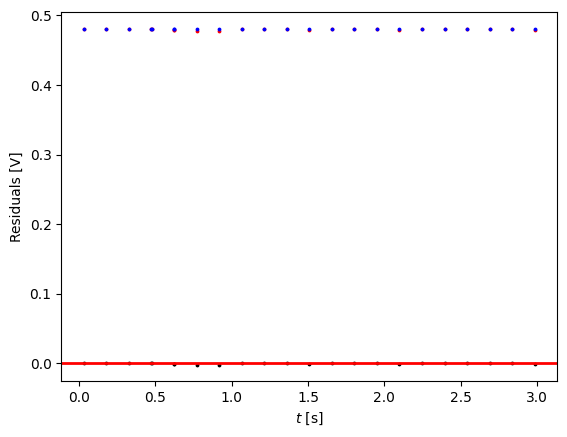

Somma dei residui = 2.435274204515281e-13
m = 0.0001725629707931553 +- 0.0004586004601123651
q = 0.06313571039532762 +- 0.0002598708624961785
m = 0.0003492605432724879 +- 0.00045857422838469565
q = -0.07368263719400397 +- 0.0002631359831991991
Av = 0.0684091737946658 +- 0.0002615034228476888|60.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV60hz.csv


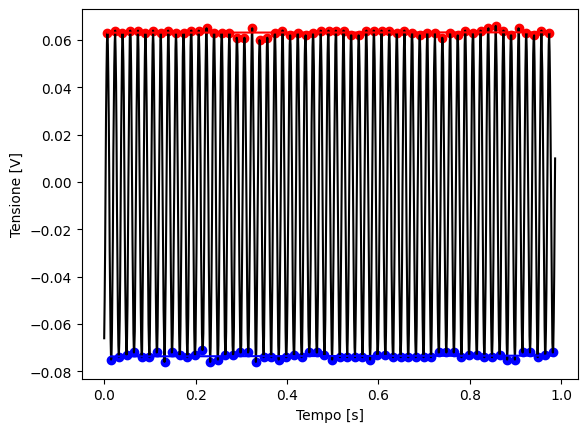

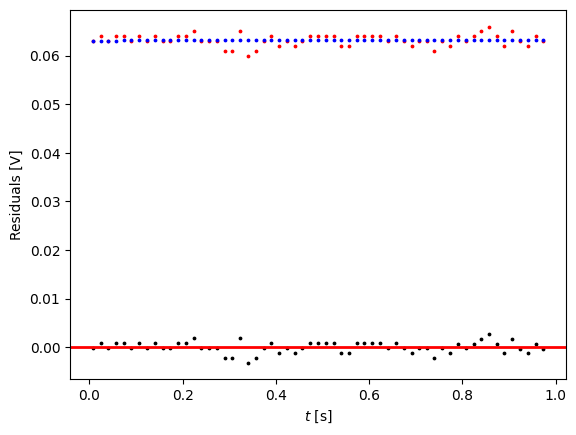

Somma dei residui = -2.288422924767719e-08
m = -0.0002243782299657937 +- 0.0009612419906201024
q = 0.05864613764218929 +- 0.0003304064562662667
m = -0.000385064102084826 +- 0.0009620354605704449
q = -0.0674665795834612 +- 0.00032423625802829094
Av = 0.06305635861282524 +- 0.0003273213571472788|65.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV65hz.csv


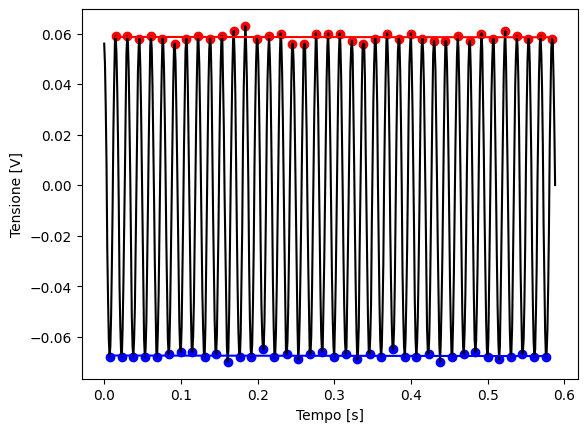

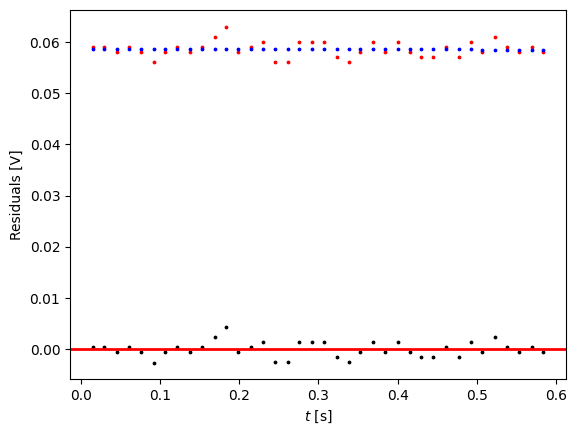

Somma dei residui = -3.0524412206189844e-08
m = -0.00017318939329994835 +- 0.00021292490165693978
q = 0.45848406524289853 +- 0.0004024530588205395
m = 4.0468538196281045e-05 +- 0.00018265083308502395
q = -0.4741659004934169 +- 0.0003489936778302876
Av = 0.4663249828681577 +- 0.0003757233683254136|7.23 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV7,23hz.csv


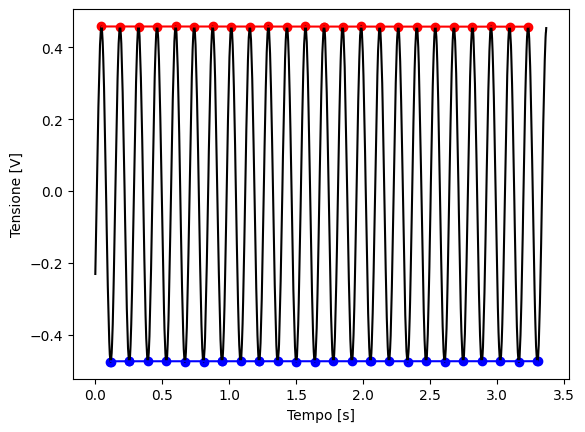

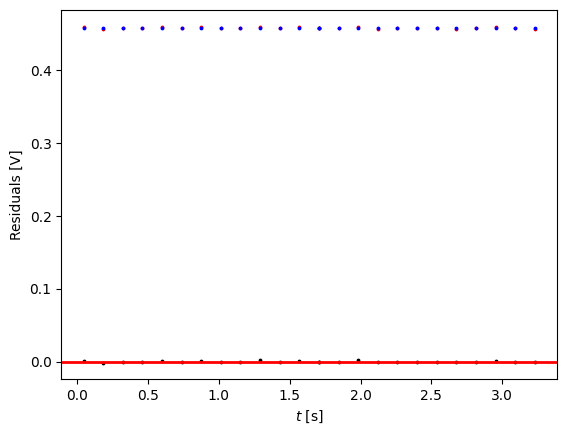

Somma dei residui = -1.98507876802978e-13
m = 0.0014491628916592455 +- 0.0004455528651949037
q = 0.4274977965355389 +- 0.0004588549597451195
m = 8.358584617407239e-05 +- 0.0004716180069344585
q = -0.443682129948731 +- 0.0005304596695919246
Av = 0.43558996324213495 +- 0.000494657314668522|7.9 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV7.90hz.csv


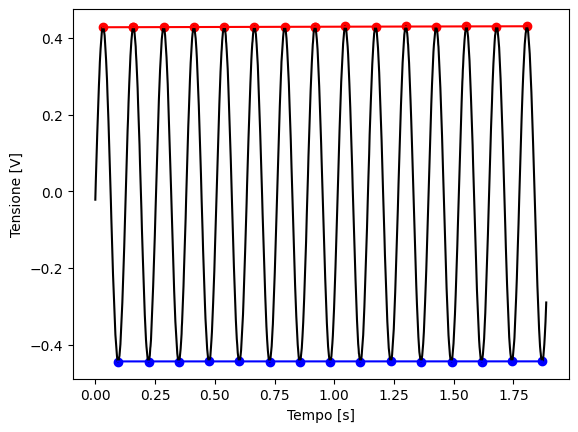

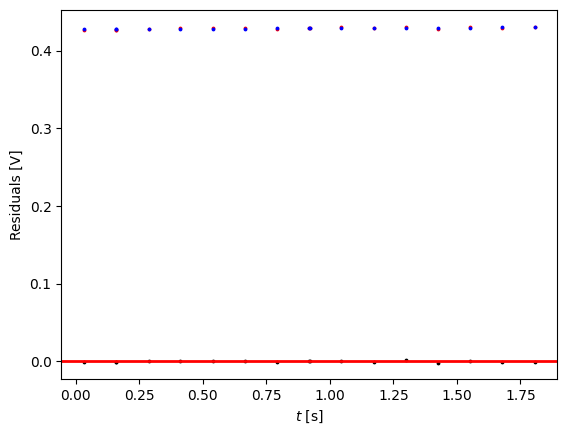

Somma dei residui = -7.216449660063518e-16
m = 1.050794464863003e-05 +- 0.00037329288164355694
q = 0.05340764964458611 +- 0.00023257611044540571
m = 8.449087474327044e-06 +- 0.00036598358505547435
q = -0.06341246636681808 +- 0.0002287751099701732
Av = 0.05841005800570209 +- 0.00023067561020778947|70.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV70hz.csv


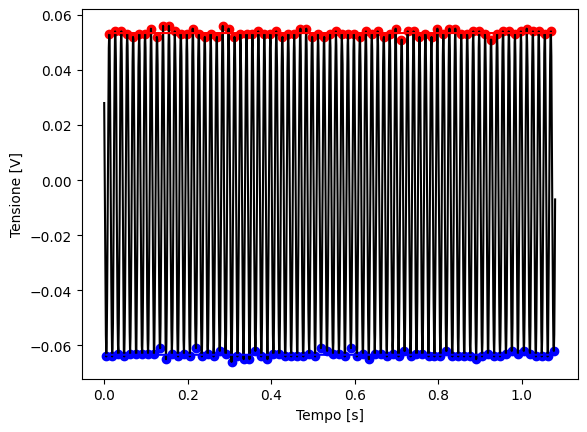

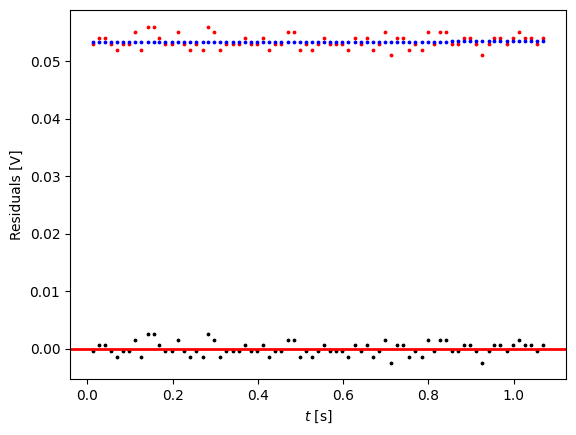

Somma dei residui = 5.340520405766602e-08
m = 0.008476173535519355 +- 0.002912843767779906
q = 0.047846392781808675 +- 0.00045515173526843814
m = -0.0003968058523661147 +- 0.002700079664946538
q = -0.060374492459555285 +- 0.0004278200873083425
Av = 0.05411044262068198 +- 0.0004414859112883903|75.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV75hz.csv


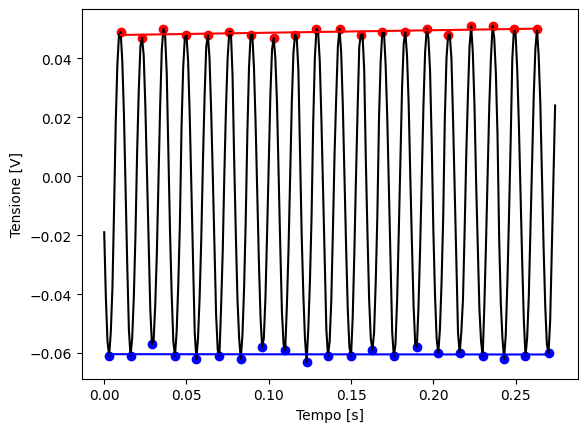

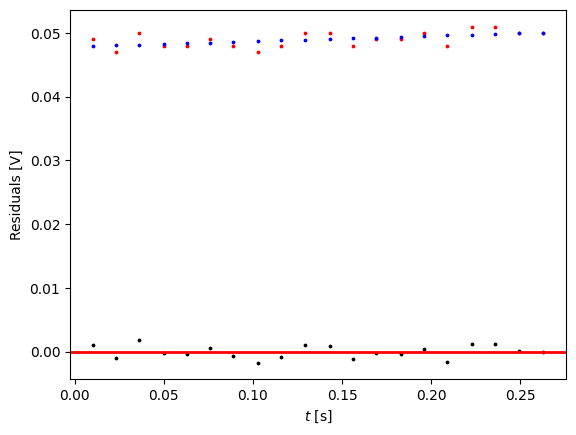

Somma dei residui = 1.428440699058342e-13
m = 9.077604757423696e-05 +- 0.0006161862986148302
q = 0.41070217637481155 +- 0.0005330144007772532
m = 0.00017166272178792408 +- 0.0006821783740267444
q = -0.42589203563943245 +- 0.0005613253199614242
Av = 0.418297106007122 +- 0.0005471698603693387|8.32 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV8.32hz.csv


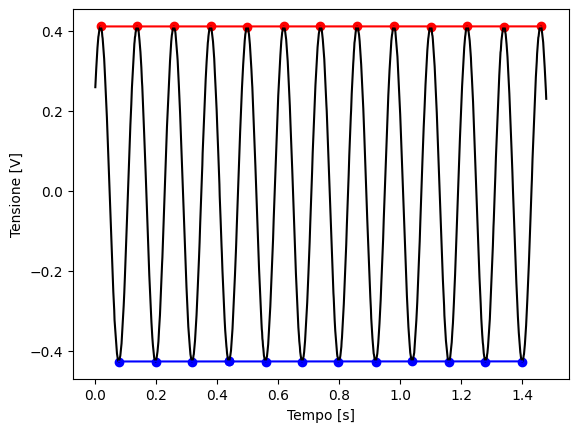

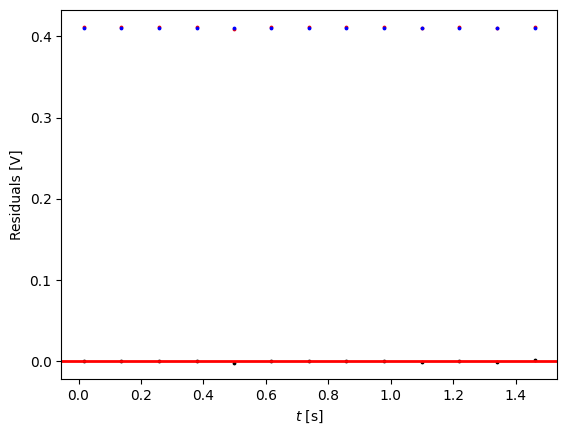

Somma dei residui = -1.5257405783231093e-08
m = -0.0021875976825505585 +- 0.0008336920231146531
q = 0.3901789014955423 +- 0.0005944144129128201
m = 0.00016553900464517514 +- 0.0010304971726054356
q = -0.4049819583611608 +- 0.0006002485502279128
Av = 0.3975804299283515 +- 0.0005973314815703665|8.88 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV8.88hz.csv


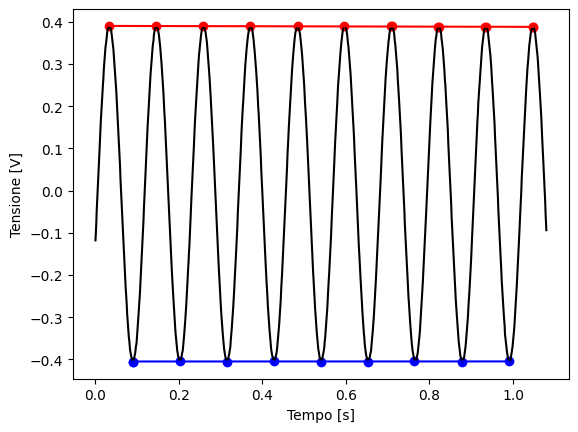

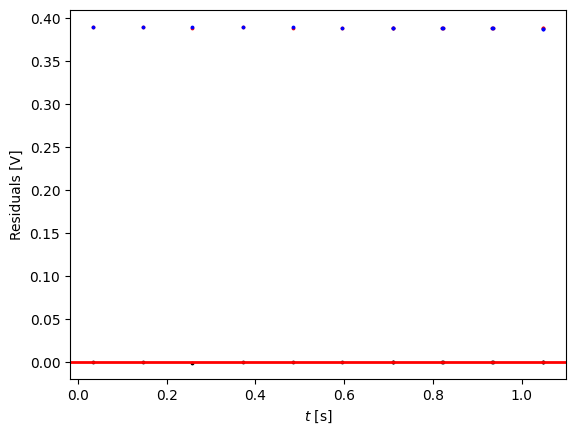

Somma dei residui = 2.8699265186560297e-14
m = 0.0018073907765295014 +- 0.0008602391478074102
q = 0.04616502495795126 +- 0.00029432477980222686
m = 0.0005664254907161663 +- 0.0008333788146629059
q = -0.05598088177762523 +- 0.0002867195255426275
Av = 0.05107295336778825 +- 0.0002905221526724272|80.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV80hz.csv


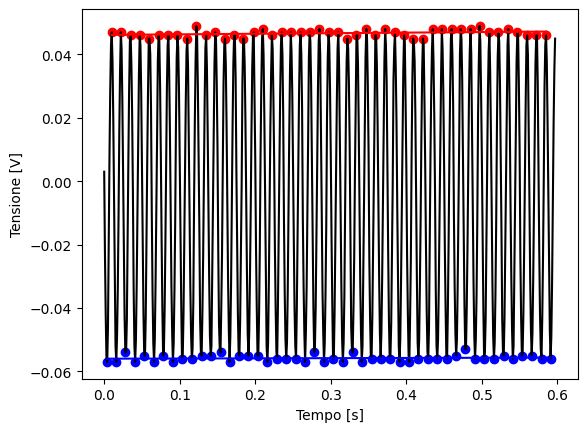

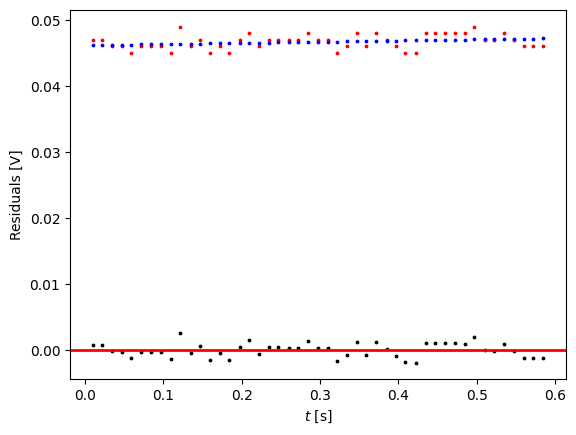

Somma dei residui = 5.032779748503913e-13
m = -0.0013129533802188806 +- 0.0007642099344141667
q = 0.3608856472319332 +- 0.0005440845028595606
m = 0.0011924501848954673 +- 0.0008430764710495105
q = -0.3769774551748705 +- 0.0005391885647789569
Av = 0.3689315512034019 +- 0.0005416365338192588|9.72 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV9,72hz.csv


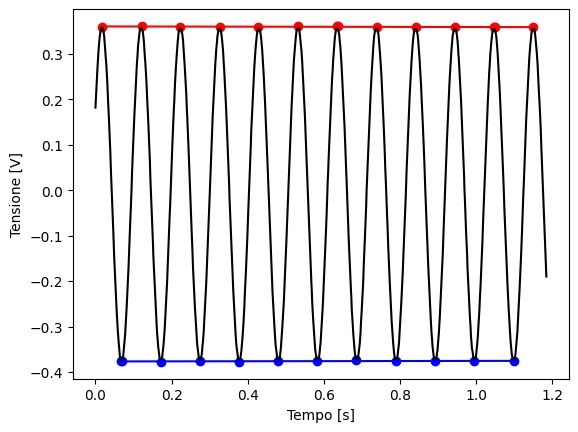

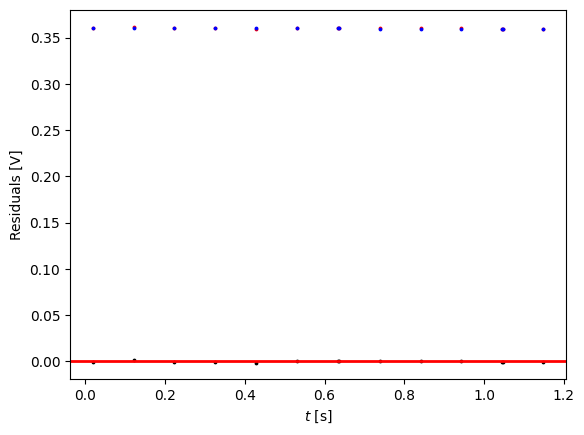

Somma dei residui = -5.10702591327572e-15
m = 0.00010459272992166322 +- 0.001186499974267226
q = 0.37564434620850384 +- 0.000706110648618284
m = -0.0006162324469776541 +- 0.0011948124610237137
q = -0.39036539747035975 +- 0.0006725467934829508
Av = 0.38300487183943177 +- 0.0006893287210506173|9.26 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV9.26hz.csv


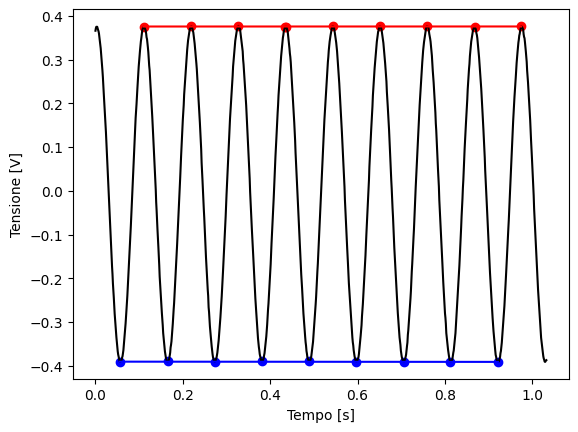

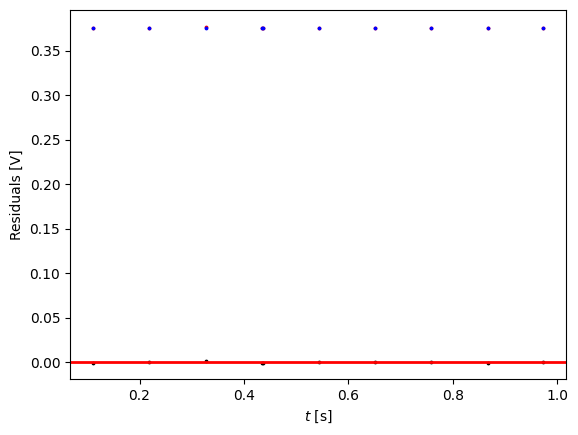

Somma dei residui = -9.51627665557453e-13
m = 0.00035127823074590806 +- 0.0007644889385577798
q = 0.04142119947531571 +- 0.0002673434103441261
m = -0.0008723349269668794 +- 0.0007861368056743647
q = -0.04936624909908645 +- 0.00027359817471501004
Av = 0.04539372428720108 +- 0.0002704707925295681|90.0 hz   C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2\AV90hz.csv


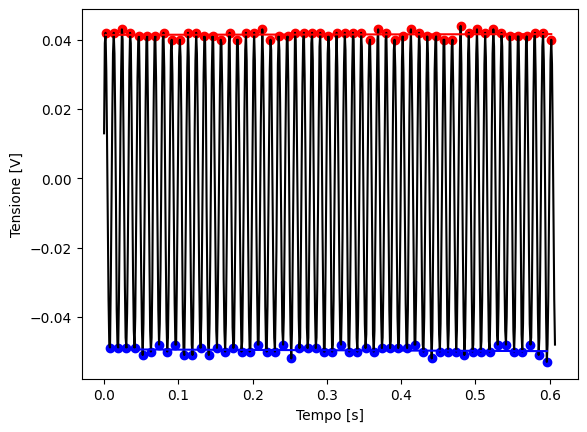

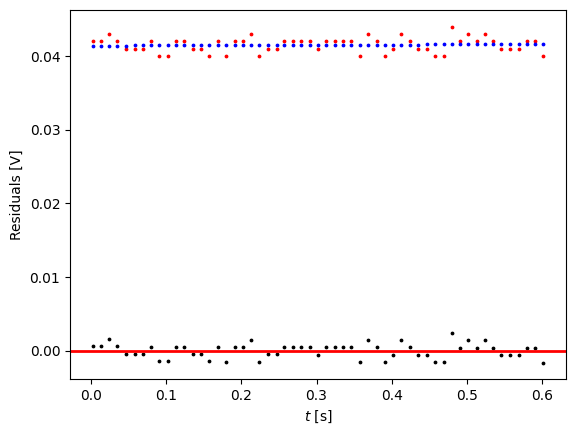

Somma dei residui = 1.4080125954052392e-12
[0.94196702 0.89156806 0.35593457 0.33683979 0.04011297 0.3230821
 0.31286022 0.29578157 0.03414772 0.27613501 0.26691408 0.25257829
 0.23641896 0.22405545 0.21285111 0.20270198 0.95930007 0.86872714
 0.83627781 0.79730495 0.19336476 0.1848295  0.17760628 0.17050153
 0.16386597 0.15804036 0.1522777  0.14145662 0.75573629 0.71417248
 0.13321479 0.12498192 0.11819101 0.11189627 0.1030844  0.64035706
 0.68054939 0.60622114 0.0968677  0.09003441 0.58038118 0.55229169
 0.08122614 0.08122614 0.52518025 0.4884018  0.06840917 0.06305636
 0.46632498 0.43558996 0.05841006 0.05411044 0.41829711 0.39758043
 0.05107295 0.36893155 0.38300487 0.04539372]
[0.0003582  0.00037042 0.00066559 0.00063949 0.00025937 0.00039575
 0.00054715 0.00066497 0.00024304 0.00049513 0.00051575 0.00043405
 0.00031701 0.00061695 0.00038948 0.00049001 0.0004602  0.00037897
 0.00031901 0.00031549 0.00046813 0.00043523 0.00037832 0.00035292
 0.00044788 0.00028424 0.00029676 0.00042

In [ ]:
# df = pd.read_csv(i, delimiter=";",skiprows=1,decimal=",")
# df = df.drop(df.columns[2], axis=1)
# df.to_csv(i, sep=";", index=False, decimal=".")

freq = [1.23, 1.80, 10.16, 10.82, 100.0, 11.34, 11.78, 12.52, 120.0, 13.5, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, \
    1.0, 2.05, 2.37, 2.76, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 3.18, 3.62, 30.0, 32.0, 34.0, 36.0,   \
    39.0, 4.47, 4.01, 4.91, 42.0, 45.0, 5.28, 5.69, 50.0, 55.0, 6.12, 6.78, 60.0, 65.0, 7.23, 7.90, 70.0, 75.0, 8.32, 8.88, 80.0, 9.72,9.26,90.0]

PathData = "C:/Users/Utente/OneDrive - UNIPA/Desktop/2° AA/lab 2/sciortino/esperimenti/RC/misure/punto 2/"
DataFiles = glob(PathData + '*.csv')
#print(DataFiles)

header = ["Tempo", "Tensione"]
Data = []

for i in DataFiles:
    df = pd.read_csv(i, sep=";", decimal=".")
    df.columns = ['Tempo', 'Tensione']
    df = df.astype(float)

    t = df["Tempo"].values
    Vc = df["Tensione"].values
    dat = np.array([t, Vc])
    Data.append(dat)
#print(Data)

A_FIT = []
A_ERR = []
err_Vg = err_Vc = 0.001
for k in range(len(Data)):
    # A_guess = (Data[k][1].max() - Data[k][1].min()) / 2
    # f_guess = freq[k]  #hz
    # phi_guess = 0
    # B_guess = np.mean(Data[k][1])
    # initial_guess = [A_guess, f_guess, phi_guess, B_guess]

    # popt, pcov = curve_fit(sinusoid, Data[k][0], Data[k][1], p0=initial_guess, sigma=err_Vg)
    # A_fit, f_fit, phi_fit, B_fit = popt
    # errors = np.sqrt(np.diag(pcov))  
    # A_err,f_err, phi_err, B_err = errors

    #t_fit = np.linspace(t.min(), t.max(), 10000)
    # Vc_fit = sinusoid(t_fit, A_fit, f_fit, phi_fit, B_fit)

    t_max, Vc_max = np.array(trova_massimi(Data[k][0], Data[k][1], 0.01))
    m,m_err,q,q_err = linear_fit(t_max, Vc_max)
    Vc_fit = m*t_max + q

    t_min, Vc_min = np.array(trova_minimi(Data[k][0], Data[k][1], 0.01))
    m1,m1_err,q1,q1_err= linear_fit(t_min, Vc_min)
    Vc_fit1 = m1*t_min + q1

    plt.plot(Data[k][0], Data[k][1], label="dati sperimentali", color="black")
    plt.plot(t_max, Vc_fit, label="fit massimi", color="red")
    plt.scatter(t_max, Vc_max, color="red", label="massimi")
    plt.plot(t_min, Vc_fit1, label="fit minimi", color="blue")
    plt.scatter(t_min, Vc_min, color="blue", label="minimi")
    plt.xlabel("Tempo [s]")
    plt.ylabel("Tensione [V]")

    A_fit = (q-q1)/2
    A_err = q_err/2+q1_err/2
    A_FIT.append(np.abs(A_fit))
    A_ERR.append(A_err)

    print("Av = "+str(A_FIT[k])+" +- "+str(A_ERR[k])+"|"+str(freq[k])+" hz   "+str(DataFiles[k]))

    plt.show()

    T_conc = np.concatenate((t_max, np.abs(t_min)))
    V_conc = np.concatenate((Vc_max, np.abs(Vc_min)))
    Vc_fit_conc = np.concatenate((Vc_fit, np.abs(Vc_fit1)))
    #residuals(T_conc, V_conc, Vc_fit_conc)
    residuals(t_max, Vc_max, Vc_fit)


A_FIT = np.array(A_FIT) #tensione cond fittata utile per la funz di trasf
A_ERR = np.array(A_ERR)
freq = np.array(freq)
print(A_FIT)
print(A_ERR)
print(freq)

err_f_trasf = A_FIT*(err_Vc/A_FIT + err_Vg)
#print(err_f_trasf)


Frequenza di taglio teorica = 5.305164769729844 +- 0.7073553026306458 Hz
f traf cut off  sperimentale = 0.6783275875544046 +- 1.700763780184288e-05
f cut off sperimentale = 4.0931504962503 +- 0.4249999999999998
y= -0.09127032339786059x + 1.0517988775293494
R^2 = 99.80509549864995%


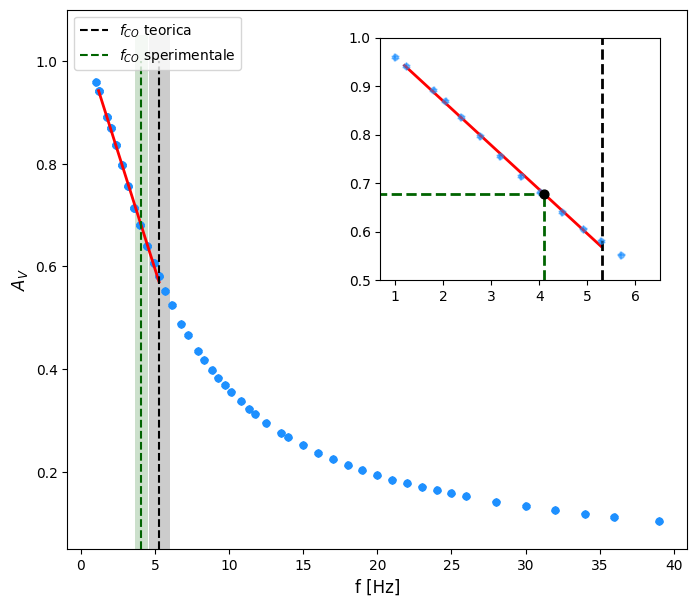

Discrepanza = 1.2120142734795438 +- 1.1323553026306457 Hz


In [ ]:
#filtri dati
mask = (freq >=1.23) & (freq <= 5.5)
f_filtered = freq[mask]
A_v_filtered = A_FIT[mask]

mask2 = (freq >= 0) & (freq <= 40)
f_filtered2 = freq[mask2]
A_v_filtered2 = A_FIT[mask2]
err_f_trasf2 = err_f_trasf[mask2]

mask3 = (freq >= 0) & (freq <= 6)
f_filtered3 = freq[mask3]
A_v_filtered3 = A_FIT[mask3]

#cut off teorico
omega_cut_off = 1/(3000*1e-5)
freq_cut_off = omega_cut_off/(2*np.pi)
err_freq_cut_off = freq_cut_off*((100/3000)+(1e-6/1e-5))
print("Frequenza di taglio teorica = " + str(freq_cut_off) + " +- " + str(err_freq_cut_off) + " Hz")

#cut off sperimentale (val max ridotto di 1/rad2)
f_trasf_cut_off = max(A_FIT)/np.sqrt(2)
err_f_trasf_cut_off = (2.4052432043295538e-05)/np.sqrt(2)
freq_CO = 4.0931504962503   #ascissa corrisponde a f_trasf_cut_off
err_freq_CO = (4.47-3.62)/2
print("f traf cut off  sperimentale = "+str(f_trasf_cut_off)+" +- "+str(err_f_trasf_cut_off))
print("f cut off sperimentale = "+str(freq_CO) + " +- " + str(err_freq_CO))


#reg lin
slope, intercept, r_value, p_value, std_err = linregress(f_filtered, A_v_filtered)
f_fit = np.linspace(1.2, 5.28, 10000)
A_v_fit = slope * f_fit + intercept

print("y= "+str(slope)+"x + "+str(intercept))
print("R^2 = "+str((r_value**2)*100)+"%")

#plot dati + inset 
fig, ax = plt.subplots(figsize=(8, 7))
ax.errorbar(f_filtered2, A_v_filtered2, color='dodgerblue', yerr=err_f_trasf[mask2],xerr=0.01 ,fmt='o', capsize=3, markersize=5)
ax.errorbar(f_filtered, A_v_filtered, color='dodgerblue', yerr=err_f_trasf[mask], xerr=0.01,fmt='o', capsize=3, markersize=5)
ax.plot(f_fit, A_v_fit, color='red',zorder=3, linewidth=2)

ax.vlines(freq_cut_off,0.05 ,1,color='black', linestyle='--', label=r"$f_{CO}$ teorica", zorder=5) 
ax.bar(freq_cut_off, 1, width=2*err_freq_cut_off, bottom=0.05 ,color='black', alpha=0.2, zorder = -10)
ax.vlines(freq_CO,0.05 ,1 ,color='darkgreen', linestyle='--', label=r"$f_{CO}$ sperimentale", zorder=5)
ax.bar(freq_CO,height=1, width=2*err_freq_CO,bottom=0.05 ,color='darkgreen', alpha=0.2, zorder=-10)

ax.set_xlabel(r"f [Hz]", fontsize=12)
ax.set_ylabel(r"$A_V$", fontsize=12)


ax_inset = inset_axes(ax, width="45%", height="45%", loc='upper right', borderpad=2)
ax_inset.errorbar(f_filtered3, A_v_filtered3, color='dodgerblue', yerr=err_f_trasf[mask3], xerr=0.01, fmt='o', capsize=3, alpha=0.5, markersize=4)
ax_inset.plot(f_fit, A_v_fit, color='red', linewidth=2)
ax_inset.scatter(freq_CO, f_trasf_cut_off, color='black', zorder=10, s=40)
ax_inset.axvline(freq_cut_off, color='black', linestyle='--', linewidth=2)
ax_inset.vlines(freq_CO,0.5,f_trasf_cut_off,color='darkgreen', linestyle='--', linewidth=2)
ax_inset.hlines(f_trasf_cut_off, 0, freq_CO, color='darkgreen', linestyle='--', linewidth=2)
ax_inset.set_xlim(0.7, 6.5)
ax_inset.set_ylim(0.5, 1)
ax.legend(loc="upper left")
plt.show()

discrepanza = np.abs(freq_CO - freq_cut_off)
err_discrepanza = err_freq_CO + err_freq_cut_off
print("Discrepanza = " + str(discrepanza) + " +- " + str(err_discrepanza) + " Hz")


tau = 0.46 +- 0.05 s
parametri di fit (tau, A, B): [0.45263006 0.05864044 0.01806295] +- [1.09375072e-02 1.15884660e-03 8.71075248e-05]
Tau sperimentale= 0.45 +- 0.01 s


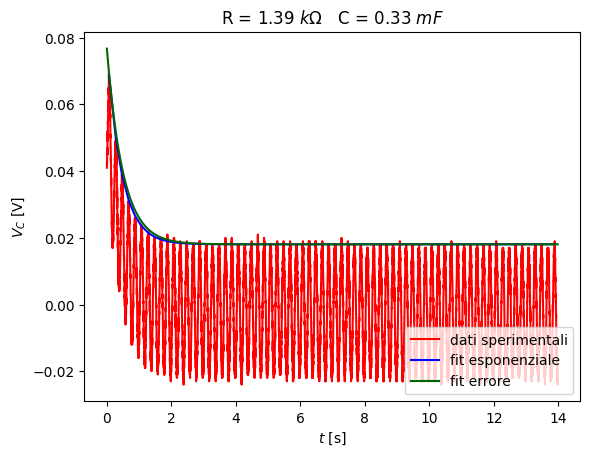

In [84]:
def trova_massimi(time, voltage, prominence):
    time=time
    voltage=voltage
    # Trova i massimi locali con una soglia di prominenza per evitare falsi massimi
    peaks, _ = find_peaks(voltage, prominence=prominence)  # Soglia regolabile
    time_peaks = time[peaks]
    voltage_peaks = voltage[peaks]
    return time_peaks, voltage_peaks

def plot_RC_fit(times,voltage,times_peaks,voltage_peaks,initial_guess,i,scatter=bool,zoom=bool):
        
    popt, pcov = curve_fit(RC, times_peaks, voltage_peaks, p0=initial_guess, sigma=err_Vc, absolute_sigma=True)

    Tau_fit, A_fit, B_fit = popt
    voltage_fit = RC(times_peaks, Tau_fit, A_fit, B_fit)
    
    errors = np.sqrt(np.diag(pcov))  
    Tau_err, A_err, B_err = errors
    print("parametri di fit (tau, A, B): "+str(popt)+" +- " + str(errors))
    print("Tau sperimentale= " + str(round(popt[0],2)) + " +- " + str(round(Tau_err,2)) + " s")

    if zoom==True:
        times=times
        voltage=voltage

    fig, ax = plt.subplots()
    ax.plot(times, voltage, color="red",label="dati sperimentali")
    ax.plot(times_peaks, voltage_fit, 'b-', label="fit esponenziale",zorder=10)
    ax.plot(times, A_fit*np.exp(-times/0.5) + B_fit, 'darkgreen', label="fit errore",zorder=10)

    if scatter==True:
        ax.scatter(times_peaks, voltage_peaks, color="black",label="massimi dataset", marker="x")
    
    ax.set_xlabel("$t$ [s]")
    ax.set_ylabel("$V_C$ [V]")
    ax.legend(loc="lower right")
    ax.set_title("R = "+ str(R[i]) + r" $k\Omega$" + "   C = " + str(C[i]) + r" $mF$")

# #R7 = 1.390 C7 = 330  tau7 = 0.46
t7_max, Vc7_max = np.array(trova_massimi(t7,Vc7,0.009))
print("tau = " + str(round(tau[6],2)) + " +- " + str(round(err_tau[6],2)) + " s")
plot7 = plot_RC_fit(t7,Vc7,t7_max,Vc7_max,[0.46,1,0],6)